In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits as fits
import healpy as hp
import pysm 
from pysm.nominal import models
from pysm.common import convert_units
import camb
from camb import model, initialpower

from numpy import linalg as LA

import utils

from utils import bin_l as bin_l

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [3]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
nside = 1024; 

In [5]:
# power_law in uK_RJ, not uK_CMB

f1 = convert_units('uK_RJ','uK_CMB', 100)
f2 = convert_units('K_CMB','uK_RJ', 100); f4 = convert_units('K_CMB','uK_RJ', 353)

In [6]:
f3 = convert_units('uK_RJ', 'uK_CMB', 95)

# Extrapolation

In [7]:
ali_ma = hp.read_map('/smc/jianyao/Ali_maps/ali_mask_wo_edge.fits', verbose=False)
# def Mask(maps): 
#     maps_ma = hp.ma(maps)
#     maps_ma.mask = np.logical_not(ali_ma)
#     return maps_ma

In [8]:
# I Q U
# uK_CMB
dust_95_psm = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/thermaldust_map_95GHz.fits', field = None), nside_out = 1024)
dust_150_psm = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/thermaldust_map_150GHz.fits', field = None), nside_out = 1024)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [9]:
# unit of CMB: uk_CMB; unit of noise: uK_CMB
cmb = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/cmb_maps_camb.fits', verbose=False, field=None), nside_out = 1024)

# noise_150 = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/noise_realizations_150.fits',field = None, verbose=False), nside_out = 1024)
# noise_150_ma = Mask(noise_150)

# # Q, U, spectra index
# # uK_RJ
# dust_real = hp.ud_grade(hp.read_map('/home/jianyao/Ali_maps/COM_CompMap_QU-thermaldust-commander_2048_R3.00_full.fits', verbose=False, field = None), nside_out = 1024)

#planck simulations
# I Q U
# K_CMB , to change the units to uk_RJ to do the extrapolation 
dust_353 = f4*hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/COM_SimMap_thermaldust-ffp10-skyinbands-353_2048_R3.00_full.fits', verbose=False, field = None), nside_out = 1024)
dust_353_psm = f4*hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/thermaldust_map_detector_F353.fits', verbose = False, field = None), nside_out=1024)
# dust_100 = 1e6*hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/COM_SimMap_thermaldust-ffp10-skyinbands-100_2048_R3.00_full.fits', verbose=False, field = None), nside_out = 1024)

In [82]:
# uK_CMB, 95GHz; 150GHz
syn_95_psm = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/synchrotron_map_95GHz.fits', verbose = False, field = None), nside_out = 1024)
syn_150_psm = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/synchrotron_map_150GHz.fits', verbose = False, field = None), nside_out = 1024)

In [10]:
def Extra(nu):
    _dust_extra = np.zeros((3, 12*nside**2))
    _dust_beta = np.ones(12*nside**2)*1.54
    # dust_extra Q map
    _dust_extra[1] = dust_353_psm[1]*(nu/353)**(_dust_beta)
    # dust_extra U map 
    _dust_extra[2] = dust_353_psm[2]*(nu/353)**(_dust_beta)
    
    return _dust_extra

In [11]:
f3 = convert_units('uK_RJ', 'uK_CMB', 95)
f5 = convert_units('uK_RJ', 'uK_CMB', 150)

dust_extra_95 = f3*Extra(95); dust_extra_150 = f5*Extra(150)

# Anisotropic and isotropic noise

In [71]:
n150cl = hp.anafast(noise_150, lmax = lmax)

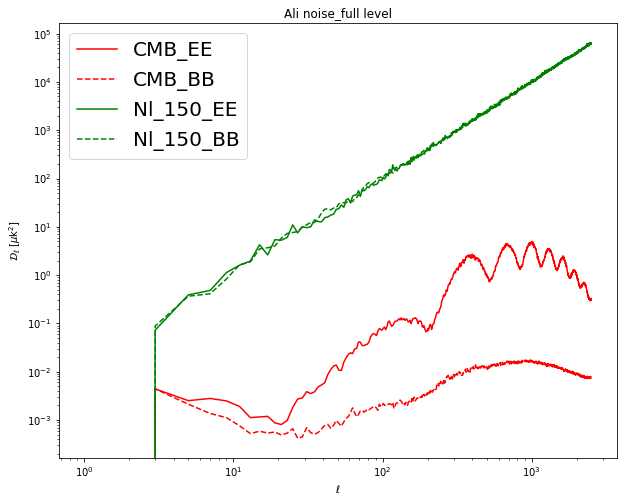

In [222]:
ell = np.arange(len(cmb_cl[0]))
plt.figure(figsize = (10,8))
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cl[1]),'r', label = 'CMB_EE')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cl[2]),'r--', label = 'CMB_BB')
# plt.loglog(ell, ell*(ell+1)/2/np.pi*cmb_cl[2],'r--', label = 'CMB_BB')

# plt.subplot(121)
# plt.plot(ell, ell*(ell+1)/2/np.pi*ncl1, 'b-x')
# # # plt.subplot(122)
# plt.plot(Ell, Ell*(Ell+1)/2/np.pi*bin_l(n2cl[1]), 'k-', label = 'Nl_95_EE')
# plt.plot(Ell, Ell*(Ell+1)/2/np.pi*bin_l(n2cl[2]), 'k--', label = 'Nl_95_BB')

plt.plot(Ell, Ell*(Ell+1)/2/np.pi*bin_l(nls[1]), 'g', label = 'Nl_150_EE')
plt.plot(Ell, Ell*(Ell+1)/2/np.pi*bin_l(nls[2]), 'g--', label = 'Nl_150_BB')

plt.xlabel('$\ell$'); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]')
plt.title('Ali noise_full level')
plt.legend(fontsize = 20)
plt.savefig('./ps_full_area_cmb_noise.pdf', format = 'pdf')

In [213]:
white_noise = hp.read_map('/smc/jianyao/Ali_maps/full_white_noise_realization_150.fits', field = None)
wn_ma = Mask(white_noise)

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [214]:
noise_150_full = hp.read_map('/smc/jianyao/Ali_maps/full_noise_realizations_150.fits',field = None, verbose=False)
noise_150_full_ma = Mask(noise_150_full)

In [215]:
#signal plus white noise
swn = cmb + white_noise
#signal plus anisotropic noise
sn = cmb + noise_150_full_ma

cmb_ma = Mask(cmb) 
sn_ma = Mask(sn) ; swn_ma = Mask(swn)

In [216]:
cmb_cls = hp.anafast(cmb_ma, lmax = lmax, nspec = 3)
sn_cls = hp.anafast(sn_ma, lmax = lmax, nspec = 3); 
nls = hp.anafast(noise_150_full_ma, lmax = lmax, nspec = 3)
swn_cls = hp.anafast(swn_ma, lmax = lmax, nspec = 3)
wnls = hp.anafast(wn_ma, lmax = lmax, nspec = 3)

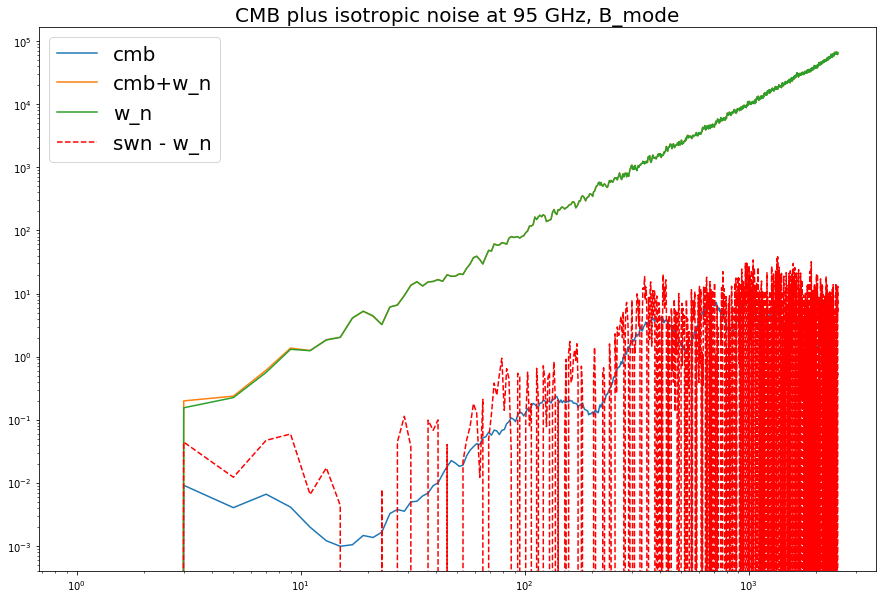

In [220]:
plt.figure(figsize = (15, 10)); S = 1
ell = np.arange(len(cmb_cls[0])); 
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cls[S]), label = 'cmb')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(swn_cls[S]), label = 'cmb+w_n')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(wnls[S]), label = 'w_n')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l((swn_cls[S] - wnls[S])), 'r--',label = 'swn - w_n')
plt.title('CMB plus isotropic noise at 95 GHz, B_mode', fontsize = 20)
plt.legend(fontsize = 20)
# plt.savefig('./cmb_white_noise_95_GHz_B.pdf', format = 'pdf')

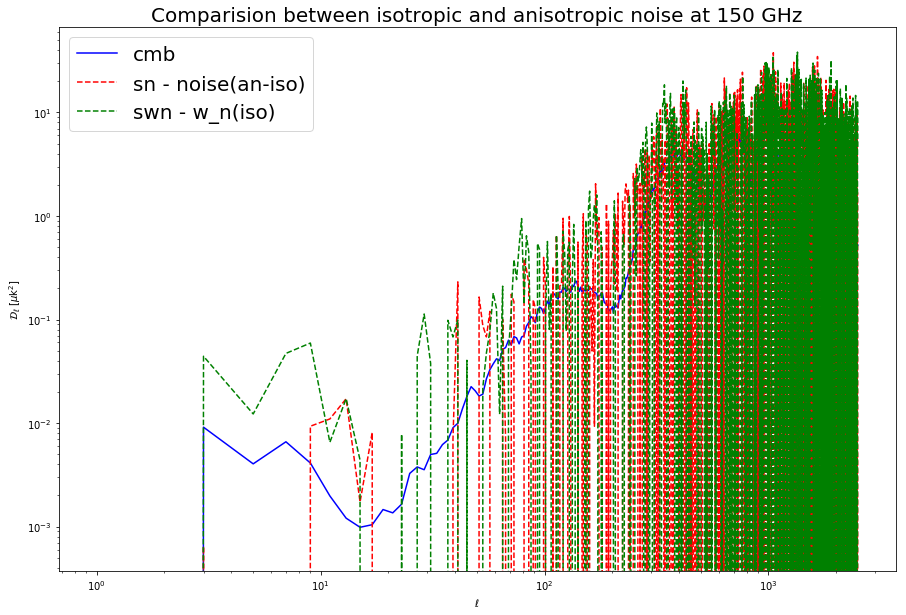

In [218]:
plt.figure(figsize = (15, 10)); S = 1
ell = np.arange(len(cmb_cls[0]))
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cls[S]), 'b-',label = 'cmb')
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(sn_cls[S]), label = 'cmb+noise')
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(nls[S]), label = 'noise')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l((sn_cls[S] - nls[S])), 'r--',label = 'sn - noise(an-iso)')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l((swn_cls[S] - wnls[S])), 'g--',label = 'swn - w_n(iso)')
plt.xlabel('$\ell$'); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]')
plt.title('Comparision between isotropic and anisotropic noise at 150 GHz', fontsize = 20)
plt.legend(fontsize = 20)
# plt.savefig('./comparision_B_mode_150GHz.pdf', format = 'pdf')

In [138]:
# plt.figure(figsize = (15, 10));
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l((swn_cls[S] - wnls[S]) - (sn_cls[S] - nls[S])), 'r--',label = 'swn - w_n')
# plt.savefig('recovery_nosie_difference_95_Bmode.pdf', format = 'pdf')

# Dealing with foreground issue

In [24]:
noise_ali = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations1.fits',field = None, verbose=False)

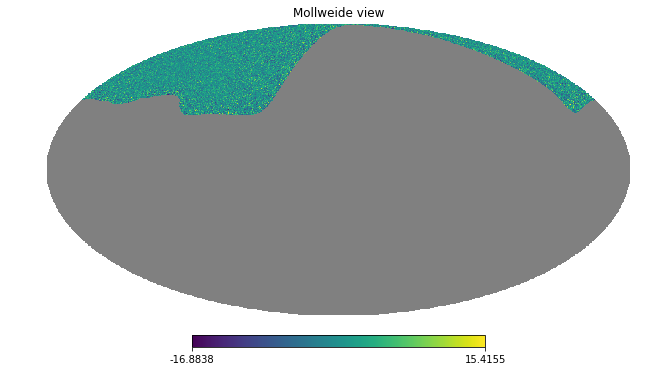

In [26]:
hp.mollview(noise_ali_ma[0])

In [25]:
noise_ali_ma = Mask(noise_ali)

In [33]:
# signal + foreground + noise
sfn = Mask(cmb + noise_ali + dust_95_psm )
sfn_cl = hp.anafast(sfn , lmax = lmax, nspec = 3)
 
#signal + foreground - extra + noise 
sn_exf = cmb + dust_95_psm - 2*dust_extra_95 + noise_ali
sn_exf_ma = Mask(sn_exf)
sn_exf_cl = hp.anafast(sn_exf_ma, lmax = lmax , nspec = 3)

In [28]:
nls = hp.anafast(noise_ali_ma, lmax = lmax, nspec = 3)

In [29]:
cmb_ma = Mask(cmb) 
cmb_cls = hp.anafast(cmb_ma, lmax = lmax, nspec = 3)

Text(0.5, 1.0, 'Dust')

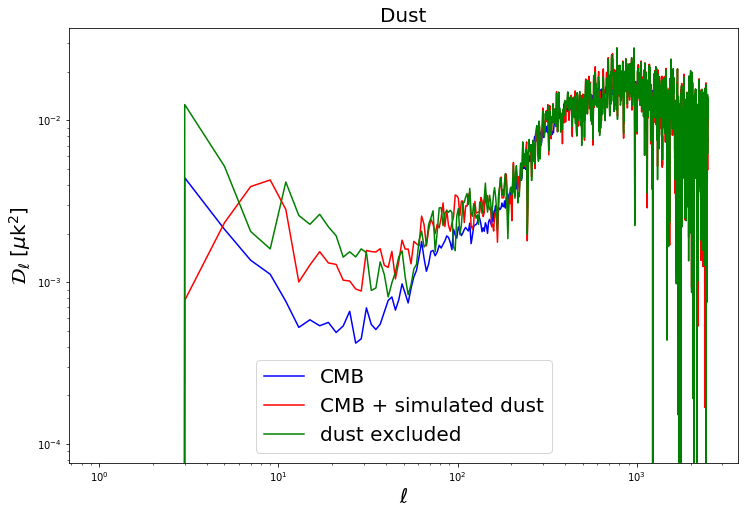

In [34]:
K = 2
ell = np.arange(len(cmb_cls[0])); #Ell = ell*(ell + 1)/2/np.pi
plt.figure(figsize = (12, 8))
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(cmb_cls[K]), 'b',label = 'CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(sfn_cl[K] - nls[K]), 'r',label = 'CMB + simulated dust')

plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*bin_l(sn_exf_cl[K] - nls[K]),'g', label = 'dust excluded')
plt.legend(fontsize = 20)

plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 20)
plt.title('Dust', fontsize = 20)
# plt.savefig('../results/noise_dust.png', format = 'png')

# Apply ILC method 

In [12]:
noise_95 = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations1.fits', field = None)
noise_150 = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations_150.fits', field = None)

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [13]:
# K_CMB, IQU
noise_353 = hp.ud_grade(hp.read_map('/fnx/jianyao/noise_simulations/noise_353_full_map_mc_00000.fits',field = None), nside_out=1024)*1e6

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [14]:
# f6 = convert_units('uK_RJ', 'uK_CMB', 353)
# dust_real = f6*hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/COM_CompMap_QU-thermaldust-commander_2048_R3.00_full.fits', verbose=False, field = None), nside_out=1024)
# # uK_RJ

In [15]:
def Power_spectrum(maps,R, lmax):
    global cl
    ''' 
    revised for upper-triangle of the matrix.
    Input:
    maps with multi-frequencies IQU sky maps. 
    Galactic plane cut for calculating the power spectrum.
    lmax.  

    Return: EE and BB cross power spectrum. 
    Shape (2, lmax, nf, nf)
    '''
    n_f = len(maps)
    cl = np.ones((2, n_f*n_f, lmax +1)); Cl = np.zeros((2, lmax+1, n_f, n_f))
    k = 0
    for i in range(n_f):
        for j in range(n_f):
            
            if i >= j :
                cross_ps = hp.anafast(maps[i], maps[j], lmax = lmax, gal_cut=R, nspec=3) ## TT, EE, BB
            else:
                cross_ps = np.zeros((3, lmax+1)) 
            cl[0][k] = cross_ps[1]; cl[1][k] = cross_ps[2]  ## calculate the E and B_mode power spectrum 
            k += 1
            
    for l in range(lmax+1):
        Cl[0, l, : , :] = cl[0, :,l].reshape(n_f, n_f); Cl[1, l, : , :] = cl[1, :,l].reshape(n_f, n_f)
        Cl[0, l] += Cl[0, l].T - np.diag(Cl[0, l].diagonal()) ; Cl[1, l] += Cl[1, l].T - np.diag(Cl[1, l].diagonal()) 
    return Cl

In [17]:
frac = 1; lmax = 2000
Nf = 3;ff = 1; fn = 1;
# total power spectrum
total = np.zeros((Nf, 3, 12*nside**2))
total[0] = dust_95_psm + cmb + noise_95 #- frac*dust_extra_95 # syn_95_
total[1] = dust_150_psm + cmb + noise_150 #- frac*dust_extra_150 #
total[2] = cmb + ff*dust_353_psm/f4*1e6 + fn*noise_353   #   + dust_real #                              #total_353， real data

### ILC in harmonics space 
total_ps = Power_spectrum(utils.Mask(total), 0, lmax = lmax)

# noise power spectrum
Noise = np.zeros((Nf,3,12*nside**2))
Noise[0] = noise_95;  Noise[1] = noise_150; Noise[2] = noise_353
noise_ps = Power_spectrum(utils.Mask(Noise), 0, lmax = lmax)

In [395]:
noise_ps[1]

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 1.55703511e-06,  5.68884828e-07,  1.18375843e-04],
        [ 5.68884828e-07,  6.81374832e-06, -4.27695138e-05],
        [ 1.18375843e-04, -4.27695138e-05,  2.64083555e-02]],

       ...,

       [[ 2.34308158e-06,  5.05647356e-08, -6.83098553e-07],
        [ 5.05647356e-08,  3.30053203e-06, -1.39155782e-06],
        [-6.83098553e-07, -1.39155782e-06,  1.41893767e-03]],

       [[ 2.33726247e-06,  7.54215793e-08, -1.91874637e-06],
        [ 7.54215793e-08,  3.20534017e-06, -1.42255548e-06],
        [-1.91874637e-06, -1.42255548e-06,  1.42675430e-03]],

       [[ 2.36738770e-06,  7.59989159e-08, -2.00531553e-06],
 

In [18]:
cmb_ma = utils.Mask(cmb) 
cmb_cls = hp.anafast(cmb_ma, lmax = lmax, nspec = 3)

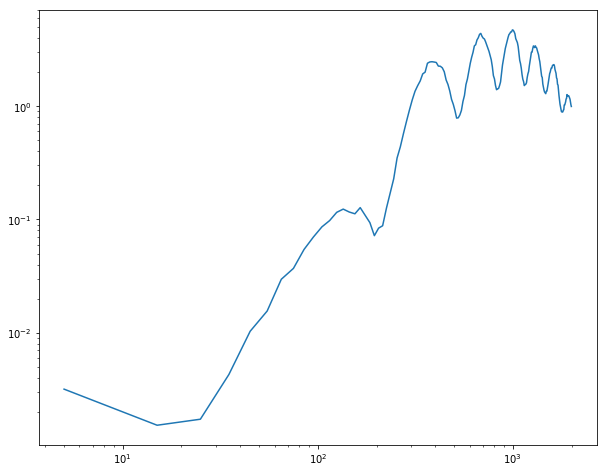

In [23]:
ell = np.arange(len(cmb_cls[0])); Q = 200
Ell = utils.get_ell(lmax, Q); Ell2 = utils.l2(Ell)

plt.loglog(Ell, Ell2*bin_l(cmb_cls[1], lmax, Q))

In [25]:
clee_clean = utils.bin_l(cmb_cls[1], lmax, Q); clbb_clean = utils.bin_l(cmb_cls[2], lmax, Q)

## ABS 

### test of the relation between noise mean value and variance, using fake data

#### For temprature maps full sky and partial sky

In [789]:
ali_ma_512 = hp.ud_grade(hp.read_map('/smc/jianyao/Ali_maps/ali_mask_wo_edge.fits', verbose=False), nside_out=512)
def Mask_test(maps): 
    maps_ma = hp.ma(maps)
    maps_ma.mask = np.logical_not(ali_ma_512)
    return maps_ma

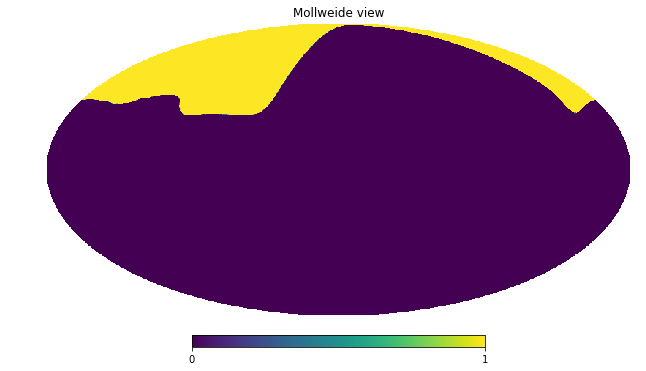

In [835]:
hp.mollview(ali_ma_512)

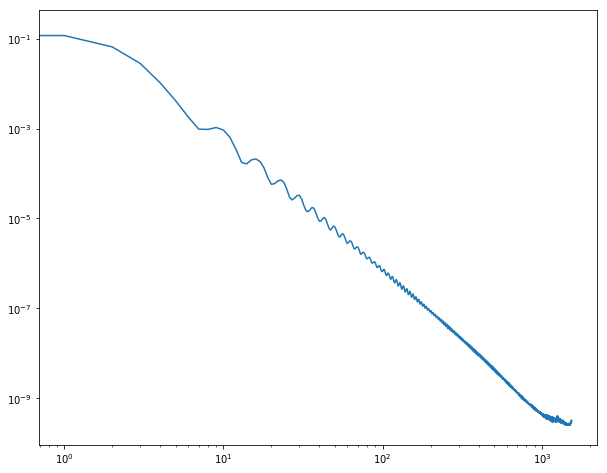

In [833]:
cl_mask = hp.anafast(ali_ma_512)
l2 = np.arange(len(cl_mask))
plt.loglog(l2, cl_mask)

In [899]:
Sam = 50 ; Q_t = 200
nl_test = np.ones(2000)*0.066**2
noise_test = np.zeros((Sam,Q_t))
for i in range(Sam):
    noise_i = hp.synfast(nl_test, nside = 512, verbose = False)
    noise_test[i] = bin_l(hp.anafast(Mask_test(noise_i), lmax = 999), L = 1000, Q = Q_t)

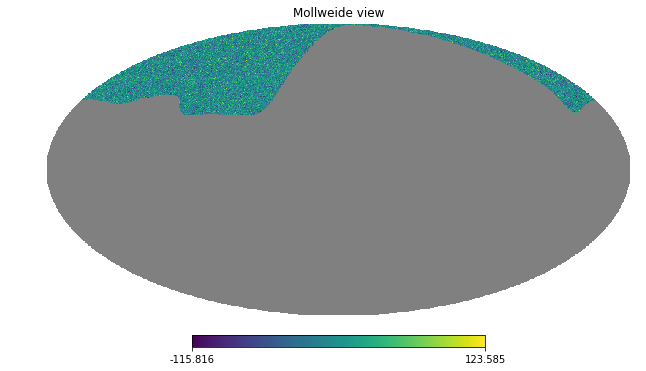

In [810]:
hp.mollview(Mask_test(noise_i))

In [ ]:
dd

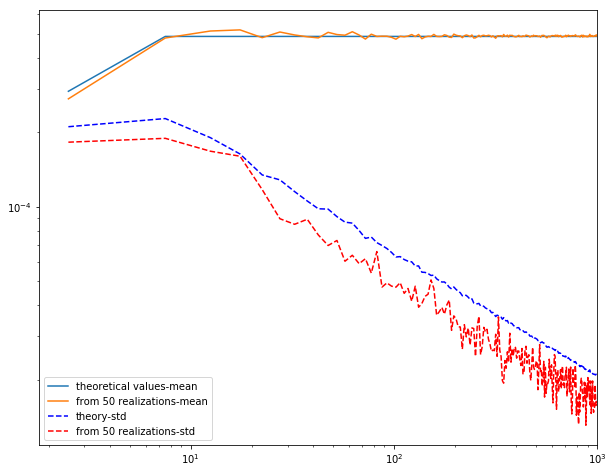

In [900]:
fsky = sum(ali_ma_512)*1.0/(12*512**2)
lll = get_ell(2000, Q_t*2)
plt.plot(lll, bin_l(nl_test, 2000, Q_t*2)*fsky, label = 'theoretical values-mean')
llll = get_ell(1000, Q_t)
plt.plot(llll, np.mean(noise_test, axis = 0), label = 'from 50 realizations-mean')

# plt.loglog(llll, np.mean(noise_test, axis = 0)/fsky*np.sqrt(2.0/((2*llll+1)*fsky)), label = 'mean from realizations with theory for std')
plt.loglog(llll, np.mean(noise_test, axis = 0)*np.sqrt(2.0/((2*llll+1)*fsky*5)), 'b--', label = 'theory-std')
plt.plot(llll, np.std(noise_test, axis = 0), 'r--', label = 'from 50 realizations-std')

plt.xlim(0, 1000)

plt.legend(fontsize = 10)
# plt.savefig('/home/jianyao/Ali_maps/results/1216/TT_mean_and_variance_partial_sky_binwidth_5.jpg', format = 'jpg')

In [901]:
np.mean(np.mean(noise_test, axis = 0)*np.sqrt(2.0/((2*llll+1)*fsky*5))/np.std(noise_test, axis = 0))

1.3097869243338618

#### For polarization data

In [762]:
nl_test = np.ones((3,2000))*0.066**2
noise_test = np.zeros((50,3,1000))
for i in range(50):
    for j in range(1,3):
        noise_i = hp.synfast(nl_test[j], nside = 512, verbose = False)
        noise_test[i][j] = hp.anafast(noise_i, lmax = 999)

TypeError: First argument must be a sequence with three elements.

In [770]:
hp.synfast(nl_test, nside = 512, verbose = False)

TypeError: First argument must be a sequence with three elements.

In [769]:
nl_test.shape

(3, 2000)

#### test the relation using Ali data

In [1322]:
cl_mean_E = np.mean(cl_all_E, axis = 0)
cl_mean_B = np.mean(cl_all_B, axis = 0)

cl_std_E = np.std(cl_all_E, axis = 0)
cl_std_B = np.std(cl_all_B, axis = 0)

(4, 2551)

In [1326]:
lcl = get_ell(2000, Q)

# plt.loglog(lcl, lcl*(lcl+1)/2/np.pi*bin_l(total[1], 2000, Q)*fsky)
# plt.loglog(lcl, lcl*(lcl+1)/2/np.pi*bin_l(total[2], 2000, Q)*fsky, label = 'theory B')

# plt.loglog(lcl, lcl*(lcl+1)/2/np.pi*cl_mean_E, label = 'simulated E')
# plt.loglog(lcl, lcl*(lcl+1)/2/np.pi*cl_mean_B, label = 'simulation B')

# plt.loglog(lcl, cl_mean_E_l2)
# plt.loglog(lcl, cl_mean_B_l2)

plt.loglog(lcl, lcl*(lcl+1)/2/np.pi*cl_mean_E*np.sqrt(2.0/((2*lcl+1)*fsky*2000/Q)), label = 'mean-std-E')
plt.loglog(lcl, lcl*(lcl+1)/2/np.pi*cl_mean_B*np.sqrt(2.0/((2*lcl+1)*fsky*2000/Q)), label = 'mean-std-B')

plt.loglog(lcl, lcl*(lcl+1)/2/np.pi*cl_std_E, label = 'std_E')
plt.loglog(lcl, lcl*(lcl+1)/2/np.pi*cl_std_B, label = 'std_B')

# plt.loglog(lcl, cl_std_B_l2, label = 'std_B_l2')
# plt.loglog(lcl, cl_std_E_l2, label = 'std_E_l2')

plt.legend(fontsize = 15)
plt.title('$C_{\ell}$ E, B with $\Delta \ell$ = 40')
plt.savefig('/home/jianyao/Ali_maps/results/1220/cmb_e_100*b_masked_sky.jpg', format = 'jpg')

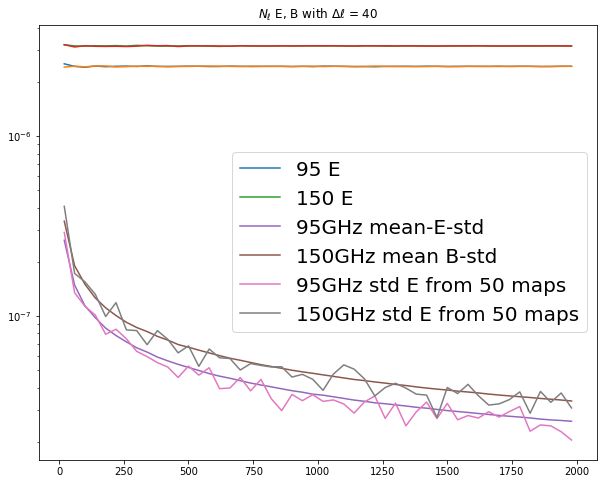

In [1103]:
ll = np.arange(len(nl_mean_95[1]))
l3l = get_ell(lmax, Q)

plt.plot(l3l, nl_mean_95_E, label = '95 E')
plt.plot(l3l, nl_mean_95_B)

plt.plot(l3l, nl_mean_150_E, label = '150 E')
plt.plot(l3l, nl_mean_150_B)

plt.plot(l3l, np.sqrt(2.0/(((2*l3l+1))*fsky*lmax/Q))*nl_mean_95_E, label = '95GHz mean-E-std')
# plt.plot(l3l, np.sqrt(2.0/(((2*l3l+1))*fsky*10))*nl_mean_95_B)

plt.plot(l3l, np.sqrt(2.0/(((2*l3l+1))*fsky*lmax/Q))*nl_mean_150_B, label = '150GHz mean B-std')
# plt.plot(ll, nl_mean_95[2])

# plt.plot(ll, nl_mean_150[1])
# plt.plot(ll, nl_mean_150[2])

plt.plot(l3l, nl_std_95_E, label = '95GHz std E from 50 maps')
# plt.plot(l3l, nl_std_95_B)

plt.plot(l3l, nl_std_150_E, label = '150GHz std E from 50 maps')
# plt.plot(l3l, nl_std_150_B)

# plt.plot(ll, nl_std_95[2])
plt.yscale('log')
# plt.plot(ll, nl_std_150[1])
# plt.plot(ll, nl_std_150[2])
plt.legend(fontsize = 20)
plt.title('$N_{\ell}$ E, B with $\Delta \ell$ = 40')
plt.savefig('/home/jianyao/Ali_maps/results/1218/2fre_nl_E_B_mean_and_std_l_40.jpg', format = 'jpg')

### ABS

In [1425]:
## for EE or BB only

nl_mean = np.zeros((Nf, Q))

# do the mean first, then bin, which is wrong !!!
# nl_mean[0] = bin_l(nl_mean_95[2])  
# nl_mean[1] = bin_l(nl_mean_150[2])

# bin first, then do the mean
# nl_mean[0] = nl_mean_95_B; nl_mean[1] = nl_mean_150_B; nl_mean[2] = nl_353_mean_B

nl_mean[0] = nl_mean_95_E; nl_mean[1] = nl_mean_150_E; nl_mean[2] = nl_353_mean_E

In [1426]:
nl_mean_matrix = np.transpose(nl_mean) 
# shape 2501*2

In [1427]:
nl_std = np.zeros(((Nf, Q)))

# nl_std[0] = nl_std_95_B; nl_std[1] = nl_std_150_B; nl_std[2] = nl_353_std_B

nl_std[0] = nl_std_95_E; nl_std[1] = nl_std_150_E; nl_std[2] = nl_353_std_E

In [317]:
for i in range(SamNum):
    
    noise_95 = hp.read_map('/smc/jianyao/Ali_maps/Noise_realizations/95GHz/noise_realizations_95GHz_%s.fits'%(i), field = None, verbose = False)
    noise_150 = hp.read_map('/smc/jianyao/Ali_maps/Noise_realizations/150GHz/noise_realizations_150GHz_%s.fits'%(i), field = None, verbose = False)
    noise_353 = 1e6*hp.ud_grade(hp.read_map('/fnx/jianyao/noise_simulations/noise_353_full_map_mc_%05d.fits'%i, field = None, verbose = False), nside_out=1024)
    
    total = np.zeros((Nf, 3, 12*nside**2))
    total[0] = dust_95_psm + cmb + noise_95 
    total[1] = dust_150_psm + cmb + noise_150 
    total[2] = cmb + ff*dust_353_psm/f4*1e6 + fn*noise_353  
    total_ps = Power_spectrum(utils.Mask(total), 0, lmax = lmax)
    np.save('/smc/jianyao/Ali_maps/ancillary_data/total_ps/total_ps_masked_EB_%s.npy'%i, total_ps)

In [183]:
D_B = np.zeros((SamNum, Q));  Q = 200; s = 5.00827749e-5; Delta = 10*s;
mode = 1 ## 0 for EE or 1 for BB mode
for n in range(SamNum):
    total_ps = np.load('/smc/jianyao/Ali_maps/ancillary_data/total_ps/total_ps_masked_EB_%s.npy'%n)
    D_B_n = np.zeros(Q);
    
    D = utils.bin_l(total_ps[mode],lmax,Q); f = []; Evals = np.ones((Q,Nf)); E_cut = 1
    sigmaD = np.zeros(Q)
    
    for i in range(Q):
            f_q = np.ones(Nf)
            for j in range(Nf):
                f_q[j] = f_q[j]/np.sqrt(nl_std_all[mode][i][j, j])   ##nl_std_all.shape = (2, Q, Nf, Nf)
            f.append(f_q) 

    for l in range(Q):
        D[l] = D[l] - nl_mean_all[mode][l] 
        for i in range(Nf): 
            for j in range(Nf):
                D[l][i,j] = D[l][i,j]/np.sqrt(nl_std_all[mode][l][i, i]*nl_std_all[mode][l][j, j]) + Delta*f[l][i]*f[l][j] 

    for l in range(0,Q): 
            e_vals,E = LA.eig(D[l])
            Evals[l,:] = e_vals        

            for i in range(Nf):
                E[:,i]=E[:,i]/LA.norm(E[:,i])**2  

            D_B_l = 0; sigmaD_l = 0; G = np.ones(Nf)
            for i in range(Nf):
                if e_vals[i]>=E_cut:
                    G_i = np.dot(f[l],E[:,i])
                    D_B_l += (G_i**2/e_vals[i])

            D_B_l = 1.0/ D_B_l - Delta
            D_B_n[l] = D_B_l

            for i in range(Nf):
                G[i]= np.dot(f[l],E[:,i])
                sigmaD[l] += (G[i]**2/e_vals[i]**2)*(clbb_clean[l] + Delta)**2

    D_B[n] = D_B_n


In [184]:
D_B_mean = np.mean(D_B, axis = 0)
D_B_std = np.std(D_B, axis = 0)

In [187]:
plt.figure(figsize = (12, 10))
plt.loglog(Ell, el2*sigmaD,'r-', label = 'ABS_theory std')
plt.loglog(Ell, el2*D_B_std, 'g-', label = 'ABS_50_realization std')

plt.loglog(Ell, el2*std_ilc, 'b-', label = 'ILC theoretical std')

plt.loglog(Ell, el2*cl_ilc_std, 'k-', label = 'ILC_50_realization std')

plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)

plt.legend(fontsize = 20)
plt.savefig('/home/jianyao/Ali_maps/results/1231/std_ABS_ILC_theory_realizations_with_real_cmb.jpg', format = 'jpg')

In [102]:
nl_353_E = np.zeros(Q); nl_353_B = np.zeros(Q)
nl_95 = np.zeros(Q); nl_150 = np.zeros(Q)
for i in range(Q):
    nl_353_E[i] = nl_mean_all[0][i][2,2]
    nl_353_B[i] = nl_mean_all[1][i][2,2]
    
    nl_95[i] = nl_mean_all[1][i][0,0]
    nl_150[i] = nl_mean_all[1][i][1,1]

In [113]:
el2 = utils.l2(Ell)

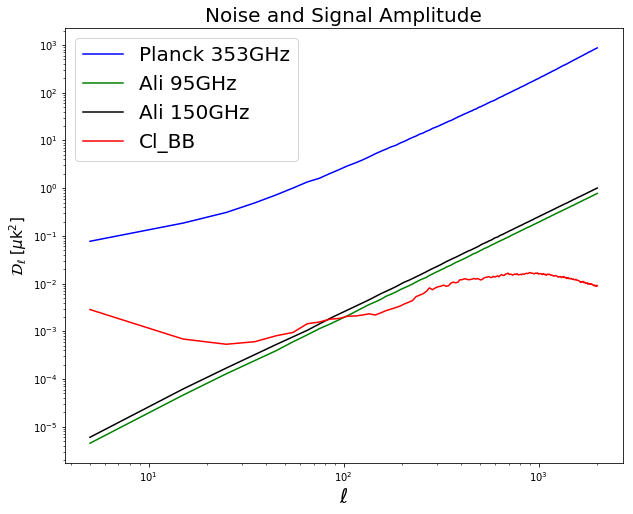

In [182]:
# plt.loglog(Ell, el2*nl_353_E)
plt.loglog(Ell, el2*nl_353_B, 'b-', label = 'Planck 353GHz')

plt.loglog(Ell, el2*nl_95/2, 'g-', label = 'Ali 95GHz')
plt.loglog(Ell, el2*nl_150/2, 'k-',label = 'Ali 150GHz')

plt.loglog(Ell, Ell*(Ell+1)*clbb_clean/2/np.pi,'r-', label = 'Cl_BB')

plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)
plt.title('Noise and Signal Amplitude', fontsize = 20)
# plt.loglog(Ell, el2*std_ilc, 'b-', label = 'ILC theoretical std')
plt.legend(fontsize = 20)
plt.savefig('/home/jianyao/Ali_maps/results/1231/Noise_and_signal.jpg', format = 'jpg')

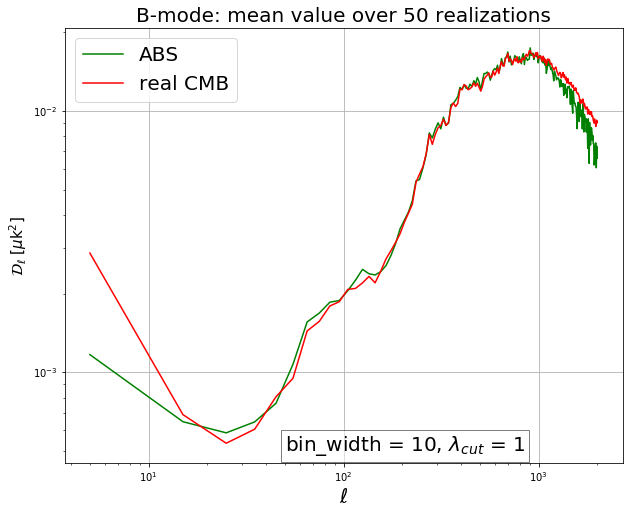

In [174]:
# ell = np.arange(len(D_B[0]))
Ell = utils.get_ell(lmax, Q)
plt.figure(figsize = (10,8))
# plt.loglog(Ell, Ell*(Ell+1)*D_B_mean/2/np.pi, 'g-')

plt.loglog(Ell, Ell*(Ell+1)*D_B_mean/2/np.pi, 'g-', label =  'ABS')

# plt.loglog(Ell, Ell*(Ell+1)*D_B_mean/2/np.pi, 'b-')

plt.loglog(Ell, Ell*(Ell+1)*clbb_clean/2/np.pi,'r-', label = 'real CMB')
plt.grid()
# plt.xscale('linear')

# plt.errorbar(Ell,Ell*(Ell+1)*D_B[40]/2/np.pi, yerr = sigmaD,fmt='-o',capthick = 1.0)
plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)
# plt.ylim(1e-5, 1)
plt.title('B-mode: mean value over 50 realizations', fontsize = 20)
plt.text(0.05*1e3, 0.5*1e-3,'bin_width = 10, $\lambda_{cut}$ = 1', fontsize = 20, bbox=dict(facecolor='white', alpha=0.5))

plt.legend(fontsize = 20)
plt.savefig('/home/jianyao/Ali_maps/results/1231/BB_bw_10_3fres_cut1_mean.jpg', format = 'jpg')

## ILC in harmonic space

In [27]:
SamNum = 50

for i in range(SamNum):
    
    noise_95 = hp.read_map('/smc/jianyao/Ali_maps/Noise_realizations/95GHz/noise_realizations_95GHz_%s.fits'%(i), field = None, verbose = False)
    noise_150 = hp.read_map('/smc/jianyao/Ali_maps/Noise_realizations/150GHz/noise_realizations_150GHz_%s.fits'%(i), field = None, verbose = False)
    noise_353 = 1e6*hp.ud_grade(hp.read_map('/fnx/jianyao/noise_simulations/noise_353_full_map_mc_%05d.fits'%i, field = None, verbose = False), nside_out=1024)
    
    Noise = np.zeros((Nf,3,12*nside**2))
    Noise[0] = noise_95;  Noise[1] = noise_150; Noise[2] = noise_353
    noise_ps_i = Power_spectrum(utils.Mask(Noise), 0, lmax = lmax)
    np.save('/smc/jianyao/Ali_maps/ancillary_data/noise_ps/noise_ps_masked_EB_%s.npy'%i, noise_ps_i)

In [75]:
nl_std_all = np.zeros((2, Q, Nf, Nf))
nl_mean_all = np.zeros((2, Q, Nf, Nf))

noise_ps_total = np.zeros((SamNum, Q, Nf, Nf))
for m in range(2):
    for i in range(SamNum):

        noise_ps_i = np.load('/smc/jianyao/Ali_maps/ancillary_data/noise_ps/noise_ps_masked_EB_%s.npy'%i)  #noise_ps_i.shape (2, 2001, 3, 3)
        noise_ps_total[i] = utils.bin_l(noise_ps_i[m], lmax, Q)  #bin first, then std
        
    nl_mean_all[m] = np.mean(noise_ps_total, axis = 0)
    nl_std_all[m] = np.std(noise_ps_total, axis = 0)

In [31]:
Cl_ilc = np.zeros((SamNum, Q))

for n in range(SamNum):
    
    total_ps_i = np.load('/smc/jianyao/Ali_maps/ancillary_data/total_ps/total_ps_masked_EB_%s.npy'%n)
    noise_ps_i = np.load('/smc/jianyao/Ali_maps/ancillary_data/noise_ps/noise_ps_masked_EB_%s.npy'%n)
    
    e = np.matrix(np.ones(Nf))

    ## Power_spectrum return EE and BB at the same time. So total_ps[0] = EE; total_ps[1] = BB
    noise_bin = utils.bin_l(noise_ps_i[1], lmax, Q); 
    noise_ilc = np.zeros(Q); 
    total_bin = utils.bin_l(total_ps_i[1], lmax, Q)

    #calculate the weight
    W = np.matrix(np.zeros((Q, Nf)))
    noise_clean = np.zeros(Q)
    for l in range(Q):
        norm = e*np.linalg.pinv((total_bin[l]))*e.T
        noise_clean[l] = e*np.linalg.pinv(noise_bin[l])*e.T   ## to get the std of ILC CMB
        W[l,:] = e*np.linalg.pinv((total_bin[l]))/norm   

    for i in range(Q):
        noise_ilc[i] = W[i,:]*(noise_bin[i])*np.transpose(W[i,:])
        Cl_ilc[n, i] = 1.0/(e*np.linalg.pinv((total_bin[i]))*e.T) - noise_ilc[i]

In [36]:
cl_ilc_mean = np.mean(Cl_ilc, axis = 0)
cl_ilc_std = np.std(Cl_ilc, axis = 0)

## ILC PS to maps

In [482]:
total_mask = Mask(total)

In [483]:
m_num = int((1 + 3*nside)*3*nside/2) # the number of alm of lmax=l for m >= 0; m = 0,1 for l = 1; m = 0,1,2 for l = 2.
alm_Q = np.zeros((Nf, m_num), dtype = 'complex128'); alm_U = np.zeros((Nf, m_num), dtype = 'complex128')
alm_Q[0] = hp.map2alm(total_mask[0][1]); alm_Q[1] = hp.map2alm(total_mask[1][1]); # 95GHz, 150GHz.
alm_U[1] = hp.map2alm(total_mask[0][2]); alm_U[1] = hp.map2alm(total_mask[1][2])

In [1226]:
def m_l(lmax, l):
    ''' 
    Return the m of corresponding l.
    
    '''
    m_id = np.ones(l+1, dtype = np.int)
    for i in range(l + 1):
        m_id[i] = hp.sphtfunc.Alm.getidx(lmax, l , i)
    return (m_id)

In [199]:
m_l(1000, 100)

array([  100,  1100,  2099,  3097,  4094,  5090,  6085,  7079,  8072,
        9064, 10055, 11045, 12034, 13022, 14009, 14995, 15980, 16964,
       17947, 18929, 19910, 20890, 21869, 22847, 23824, 24800, 25775,
       26749, 27722, 28694, 29665, 30635, 31604, 32572, 33539, 34505,
       35470, 36434, 37397, 38359, 39320, 40280, 41239, 42197, 43154,
       44110, 45065, 46019, 46972, 47924, 48875, 49825, 50774, 51722,
       52669, 53615, 54560, 55504, 56447, 57389, 58330, 59270, 60209,
       61147, 62084, 63020, 63955, 64889, 65822, 66754, 67685, 68615,
       69544, 70472, 71399, 72325, 73250, 74174, 75097, 76019, 76940,
       77860, 78779, 79697, 80614, 81530, 82445, 83359, 84272, 85184,
       86095, 87005, 87914, 88822, 89729, 90635, 91540, 92444, 93347,
       94249, 95150])

In [484]:
alm_Q_clean = (np.zeros(m_num,dtype = 'complex128')); alm_U_clean = np.zeros(m_num, dtype = 'complex128')
for l in np.arange(lmax):
    alm_Q_clean[m_l(lmax, l)] = np.dot(np.array(W[l, :]),alm_Q[:,m_l(lmax, l)])[0] #np.dot(np.array(weight[l, :]),alm_Q[:,m_l(lmax, l)])[0]#
    alm_U_clean[m_l(lmax, l)] = np.dot(np.array(W[l, :]),alm_U[:,m_l(lmax, l)])[0]
alm_Q_clean[m_l(lmax, 0)] = 0; alm_Q_clean[m_l(lmax, 1)] = 0
alm_U_clean[m_l(lmax, 0)] = 0; alm_U_clean[m_l(lmax, 1)] = 0

In [485]:
Q_clean = hp.alm2map(alm_Q_clean, nside = nside); U_clean = hp.alm2map(alm_U_clean, nside = nside);
I_clean = np.zeros_like(Q_clean)
cmb_clean = np.row_stack((I_clean, Q_clean, U_clean))
alm_total = hp.map2alm(cmb_clean)
B_maps = hp.alm2map(alm_total[2], nside = nside, verbose = False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


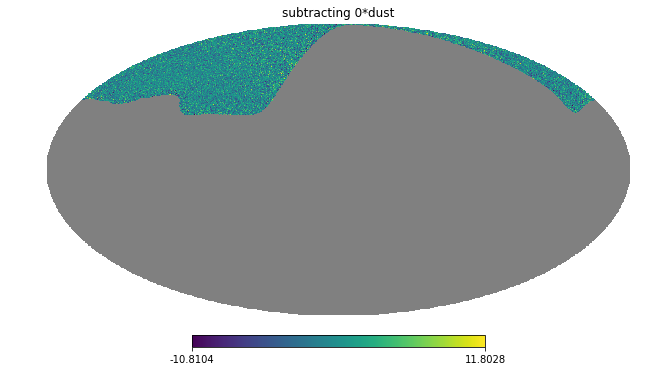

In [486]:
hp.mollview(Mask(B_maps), title = 'subtracting 0*dust')
plt.savefig('subtracting 0*dust.png', format = 'png')

In [464]:
alm_cmb = hp.map2alm(cmb)
b_cmb = hp.alm2map(alm_cmb[2], nside = nside, verbose = False)

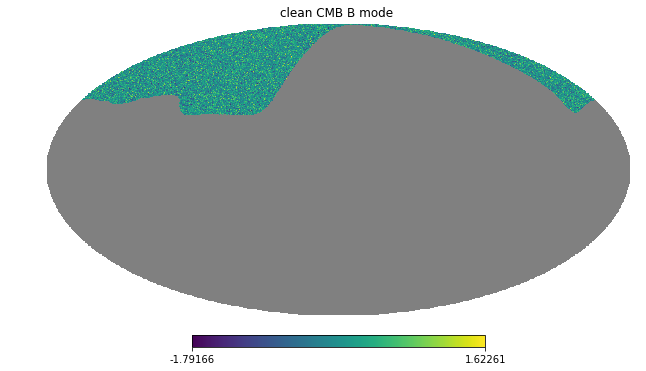

In [456]:
hp.mollview(Mask(b_cmb), title = 'clean CMB B mode ')
plt.savefig('clean_b_mode.png', format = 'png')

## ILC results plots

$\large{\left\langle\delta \tilde{C}_{\ell}^{2}\right\rangle=\frac{2\left\langle C_{\ell}\right\rangle}{2 \ell+1}\left(\left\langle C_{\ell}\right\rangle+\frac{1-n_{c}}{2 \ell+1}\left\langle C_{\ell}\right\rangle+\frac{2}{\mathbf{e}^{\dagger} \hat{\mathbf{N}}_{\ell}^{-1} \mathbf{e}}\right)}$

In [48]:
std_ilc = np.sqrt(2*cl_ilc_mean/(2*Ell + 1)*( (1-Nf)*cl_ilc_mean/(2*Ell + 1) + 2/noise_clean))

/home/jianyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


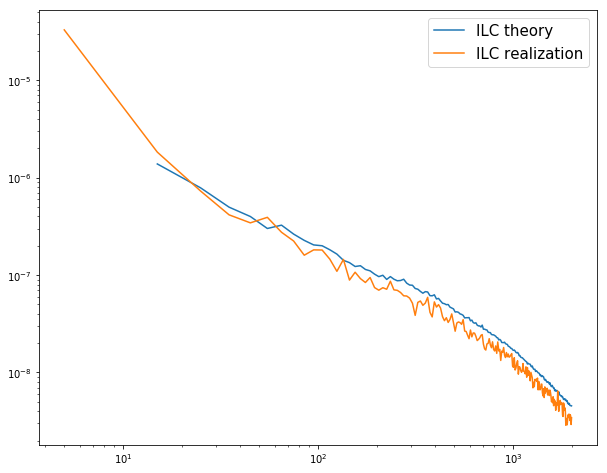

In [49]:
plt.loglog(Ell, std_ilc, label = 'ILC theory')
plt.loglog(Ell, cl_ilc_std, label = 'ILC realization')
plt.legend(fontsize = 15)

In [41]:
total_ps_95 = hp.anafast(Mask(total[0]), lmax = lmax, nspec = 3); nl_95 = hp.anafast(Mask(noise_95), lmax = lmax, nspec = 3)

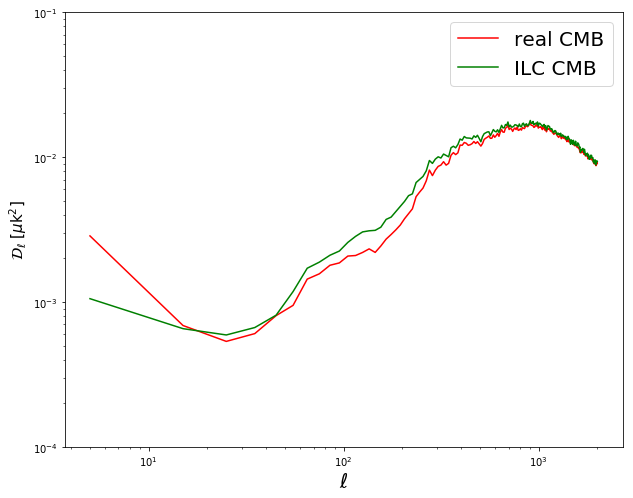

In [37]:
fig1 = plt.figure(1, figsize=(10,8))
# plt.axis('off')
# frame1=fig1.add_axes((.1,.4,.8,.5)) # x0, y0, width, height
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clbb_clean, 'r-',label = 'real CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cl_ilc_mean, 'g-', label = 'ILC CMB')
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*noise_ilc, 'b--', label = 'noise_ilc')
# plt.xscale('linear')
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cl_extra, 'b-',label = 'extra CMB')
# plt.errorbar(Ell,Ell*(Ell+1)*cl_ilc/2/np.pi, yerr = std_ilc,fmt='-o',capthick = 0.1)
plt.ylim(1e-4, 1e-1)
plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)
plt.legend(fontsize = 20)
# plt.title('ILC in harmonical space, subtracting %s * dust'%frac, fontsize = 20)

# frame2=fig1.add_axes((.1,.1,.8,.3))
# plt.semilogx(Ell, (cl_ilc - cls)/cls*100, 'k--')
# plt.axhline(0,color = 'k')
# plt.ylabel(r'$\Delta \mathcal{D}_\ell$/$\mathcal{D}^{real}_{\ell} $ [%]', fontsize = 15);plt.xlabel(r'$\ell$', fontsize = 20)
# plt.ylim(-100, 100)
# plt.savefig('/home/jianyao/Ali_maps/results/1106_ILC_dust_level_pixel_space/Ell_%s_dust.png'%frac, format = 'png')

## Comparision between 150GHz and 353GHz 

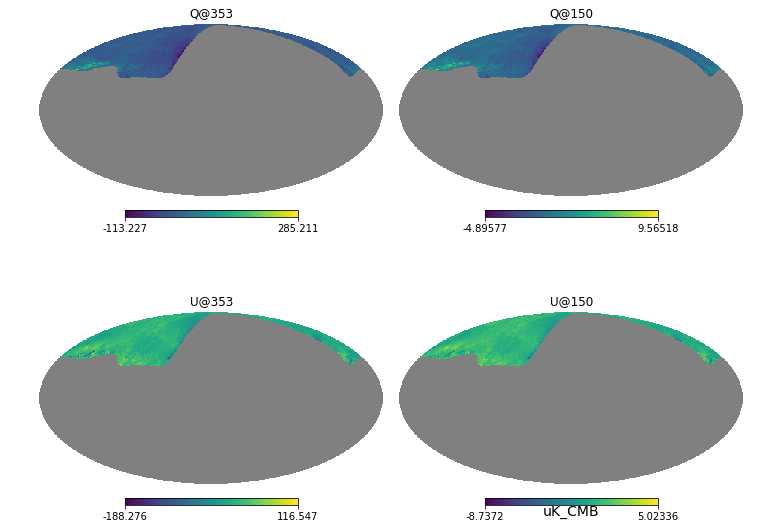

In [1420]:
plt.figure(figsize = (10, 8))
hp.mollview(Mask(dust_353_psm[1]/f4*1e6),sub = (221), title = 'Q@353'); hp.mollview(Mask(dust_150_psm[1]), sub = (222), title = 'Q@150')
hp.mollview(Mask(dust_353_psm[2]/f4*1e6),sub = (223), title = 'U@353'); hp.mollview(Mask(dust_150_psm[2]), sub = (224), title = 'U@150',unit = 'uK_CMB')
plt.savefig('/home/jianyao/Ali_maps/results/1121/dust_maps.png', format = 'png')

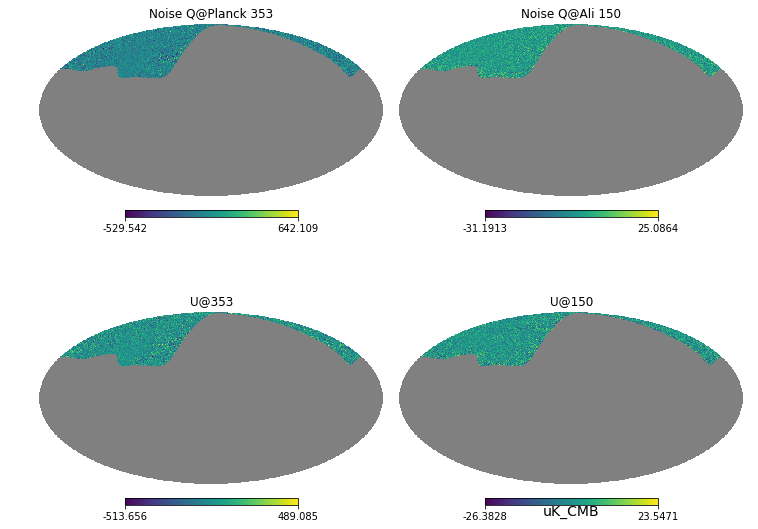

In [1419]:
plt.figure(figsize = (10, 8))
hp.mollview(Mask(noise_353[1]),sub = (221), title = 'Noise Q@Planck 353'); hp.mollview(Mask(noise_150[1]), sub = (222), title = 'Noise Q@Ali 150')
hp.mollview(Mask(noise_353[2]),sub = (223), title = 'U@353'); hp.mollview(Mask(noise_150[2]), sub = (224), title = 'U@150', unit = 'uK_CMB')
plt.savefig('/home/jianyao/Ali_maps/results/1121/noise_maps.png', format = 'png')

## QU to EB
### transform QU to EB, than do ILC directly on the EB mps

In [247]:
# QU to B 
def QU2EB(maps):
    if len(maps.shape) <= 2:
        alm_total = hp.map2alm(maps)
        E_maps = hp.alm2map(alm_total[1], nside = nside, verbose = False)
        B_maps = hp.alm2map(alm_total[2], nside = nside, verbose = False)
    
    else: 
        E_maps = np.zeros((len(maps), 12*nside**2)); B_maps = np.zeros((len(maps), 12*nside**2)); 
        for i in range(len(maps)):
            alm_total = hp.map2alm(maps[i])
            E_maps[i] = hp.alm2map(alm_total[1], nside = nside, verbose = False)
            B_maps[i] = hp.alm2map(alm_total[2], nside = nside, verbose = False)
            
    return E_maps, B_maps

In [248]:
total_E, total_B= QU2EB(Mask(total))

In [173]:
total.shape

(3, 3, 12582912)

In [251]:
## noise all 
Noise_E = np.zeros_like(total[0]); Noise_B = np.zeros_like(total[0])
Noise_E[0], Noise_B[0] = QU2EB(Mask(noise_95)); Noise_E[1], Noise_B[1] = QU2EB(Mask(noise_150)); Noise_E[2], Noise_B[2] = QU2EB(Mask(fn*noise_353))

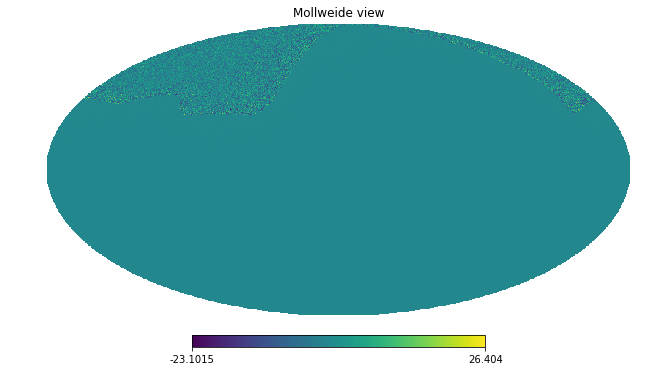

In [254]:
hp.mollview(Noise_E[1])

In [255]:
Cov_E = np.zeros((Nf, Nf)); w_E = np.zeros(Nf)
Cov_B = np.zeros((Nf, Nf)); w_B = np.zeros(Nf)

for i in range(Nf):
    for j in range(Nf):
#         Cov_E[i, j] = np.dot(total_E[i][mask_index] - np.mean(total_E[i][mask_index]), total_E[j][mask_index] - np.mean(total_E[j][mask_index]))/1.0/len(mask_index)
#         Cov_B[i, j] = np.dot(total_B[i][mask_index] - np.mean(total_B[i][mask_index]), total_B[j][mask_index] - np.mean(total_B[j][mask_index]))/1.0/len(mask_index)

##full_sky 12-05, 2019
        Cov_E[i, j] = np.dot(total_E[i] - np.mean(total_E[i]), total_E[j] - np.mean(total_E[j]))/1.0/len(total_E[i])
        Cov_B[i, j] = np.dot(total_B[i] - np.mean(total_B[i]), total_B[j] - np.mean(total_B[j]))/1.0/len(total_E[i])

Cov_E_inv = np.linalg.pinv(Cov_E)
Cov_B_inv = np.linalg.pinv(Cov_B)

for i in range(Nf):
    w_E[i] = np.sum(Cov_E_inv[i,:])/np.sum(Cov_E_inv)
    w_B[i] = np.sum(Cov_B_inv[i,:])/np.sum(Cov_B_inv)

# cmb_E = np.dot(w_E, total_E*ali_ma)
# cmb_B = np.dot(w_B, total_B*ali_ma)

cmb_E = np.dot(w_E, total_E)
cmb_B = np.dot(w_B, total_B)

# noise_ilc_E = np.dot(w_E, Noise_E*ali_ma); 
# noise_ilc_B = np.dot(w_B, Noise_B*ali_ma)

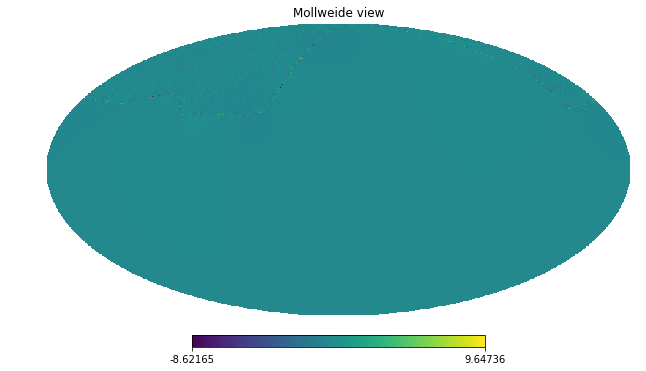

In [256]:
hp.mollview(cmb_B)

In [257]:
cl_bb = hp.anafast((cmb_B), lmax = lmax); cl_ee = hp.anafast((cmb_E), lmax = lmax)
clbb_bin = bin_l(cl_bb); clee_bin = bin_l(cl_ee)

# nl_ee = hp.anafast(noise_ilc_E, lmax = lmax); nl_bb = hp.anafast(noise_ilc_B, lmax = lmax)
# nlee_bin = bin_l(nl_ee); nlbb_bin = bin_l(nl_bb)

(-100, 100)

<Figure size 720x576 with 0 Axes>

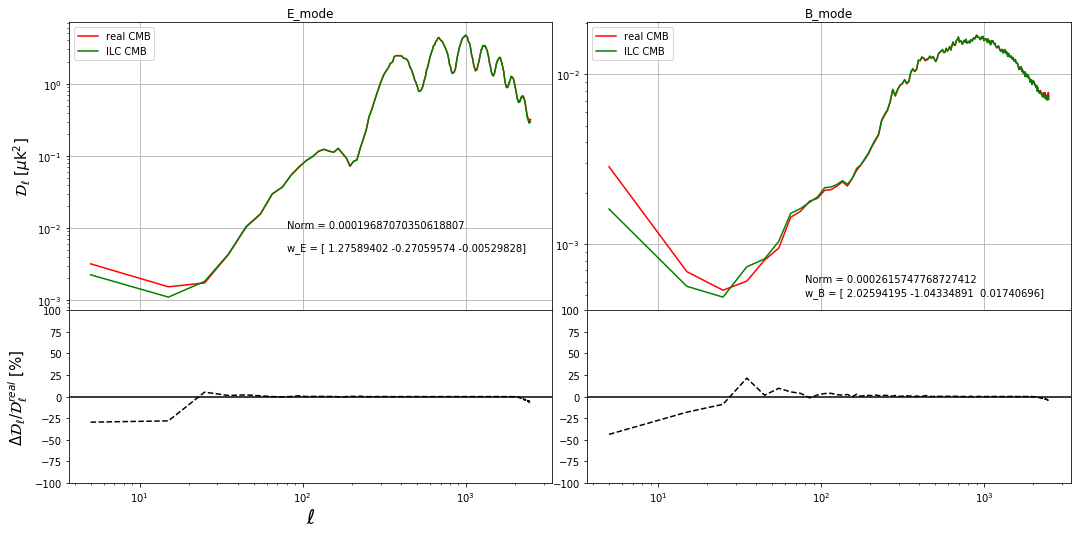

In [270]:
plt.figure(figsize = (10, 8))
ell = np.arange(len(cl_bb))

clee_bin_de = clee_bin #- nlee_bin
clbb_bin_de = clbb_bin #- nlbb_bin
# 
fig2 = plt.figure(2, figsize=(16,8))
# ax = plt.subplot(1,2,1)
plt.axis('off')
frame1=fig2.add_axes((.1,.4,.42,.5))  # x0, y0, width, height
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clee_clean, 'r-',label = 'real CMB')

# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cmb_ee_full, 'r-',label = 'real CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clee_bin_de, 'g-', label = 'ILC CMB') 
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*nlee_pix, 'b--', label = 'noise_ilc')

plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)
plt.legend(fontsize = 10)
plt.title('E_mode')
# plt.title('%s_dust_%s_noise_pixel.png'%(ff, fn))
plt.legend(fontsize = 10)
norm = np.linalg.norm(clee_bin_de - clee_clean)
plt.text(80, 0.01, 'Norm = %s'%norm)
plt.text(80, 0.01/2, 'w_E = %s'%w_E)
plt.grid()
frame2=fig2.add_axes((.1,.1,.42,.3))
plt.semilogx(Ell, (clee_bin_de - clee_clean)/clee_clean*100, 'k--')
plt.axhline(0,color = 'k')
plt.ylabel(r'$\Delta \mathcal{D}_\ell$/$\mathcal{D}^{real}_{\ell} $ [%]', fontsize = 15);plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylim(-100, 100)
# plt.savefig('/home/jianyao/Ali_maps/results/1202/3fre_wt_noise_wo_extra_Emode.png', format = 'png')
# ###BB
# fig1 = plt.figure(1, figsize=(10,8))
# # ax = plt.subplot(1,2,1)
# plt.axis('off')
frame3=fig2.add_axes((.55,.4,.42,.5))  # x0, y0, width, height
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clbb_clean, 'r-',label = 'real CMB')
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clbb_cn,label = 'real CMB wo E-B leakage')
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cmb_bb_full, 'r-',label = 'real CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clbb_bin_de, 'g-', label = 'ILC CMB') 
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*nlbb_pix, 'b--', label = 'noise_ilc')
norm = np.linalg.norm(clbb_bin_de - clbb_clean)
plt.text(80, 6e-4, 'Norm = %s'%norm)
plt.text(80, 5e-4, 'w_B = %s'%w_B)
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cl_extra, 'b-',label = 'extra CMB')
plt.grid()
# plt.xlabel('$\ell$', fontsize = 20); plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)
plt.legend(fontsize = 10)
plt.title('B_mode')
# plt.title('%s_dust_%s_noise_pixel.png'%(ff, fn))
plt.legend(fontsize = 10)

frame4=fig2.add_axes((.55,.1,.42,.3))
plt.semilogx(Ell, (clbb_bin_de - clbb_clean)/clbb_clean*100, 'k--')
plt.axhline(0,color = 'k')
# plt.ylabel(r'$\Delta \mathcal{D}_\ell$/$\mathcal{D}^{real}_{\ell} $ [%]', fontsize = 15);plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylim(-100, 100)


# plt.savefig('/home/jianyao/Ali_maps/results/1203/3fre_wo_noise_on_EB_corrected.png', format = 'png')

## ILC in pixel space

In [27]:
cmb_ma = utils.Mask(cmb) 
cmb_cls = hp.anafast(cmb_ma, lmax = lmax, nspec = 3)
clee_clean = utils.bin_l(cmb_cls[1], lmax, Q); clbb_clean = utils.bin_l(cmb_cls[2], lmax, Q)

In [197]:
### calculate the B-mode without E-B leakage...

alm_cmb = hp.map2alm(cmb);
cmb_e = hp.alm2map(alm_cmb[1], nside = 1024); cmb_b = hp.alm2map(alm_cmb[2], nside = 1024)

## clean cl, no E-B leakage
clbb_cn = bin_l(hp.anafast(Mask(cmb_b)))
clee_cn = bin_l(hp.anafast(Mask(cmb_e)))

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [342]:
ali_ma = hp.read_map('/smc/jianyao/Ali_maps/ali_mask_wo_edge.fits')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [343]:
index = np.arange(12*nside**2)
mask_index = index[ali_ma == 1] # full sky ....

In [18]:
def QU(total_masked, index_of_mask):
    totQ = np.zeros(Nf, 12*nside**2)
    for i in range(Nf):
        totQ[i] = total_masked[i][1]*ali_ma;
        totU[i] = total_masked[i][2]*ali_ma; 
    return totQ, totU

In [347]:
total_mask = total ##Mask(total)

total_Q = np.zeros((Nf, 12*nside**2)) ## two frequencies

total_Q[0][mask_index] = total_mask[0][1][mask_index] ; total_Q[1][mask_index]  = total_mask[1][1][mask_index];
if Nf > 2:
    total_Q[2][mask_index]  = total_mask[2][1][mask_index] 

total_U = np.zeros((Nf, 12*nside**2)) ## two frequencies
total_U[0][mask_index] = total_mask[0][2][mask_index] ; total_U[1][mask_index]  = total_mask[1][2][mask_index]; 
if Nf>2:
    total_U[2][mask_index]  = total_mask[2][2][mask_index] 

# noise_ILC
noise_Q = np.zeros((Nf, 12*nside**2)); noise_U= np.zeros((Nf, 12*nside**2))
noise_Q[0][mask_index] = noise_95[1][mask_index]; noise_Q[1][mask_index] = noise_150[1][mask_index]; 
noise_Q[2][mask_index] = fn*noise_353[1][mask_index]

noise_U[0][mask_index] = noise_95[2][mask_index]; noise_U[1][mask_index] = noise_150[2][mask_index]; 
noise_U[2][mask_index] = fn*noise_353[2][mask_index]

In [348]:
Cov_Q = np.zeros((Nf, Nf)); w_Q = np.zeros(Nf)
Cov_U = np.zeros((Nf, Nf)); w_U = np.zeros(Nf)

for i in range(Nf):
    for j in range(Nf):
        Cov_Q[i, j] = np.dot(total_Q[i][mask_index] - np.mean(total_Q[i][mask_index]), total_Q[j][mask_index] - np.mean(total_Q[j][mask_index]))/1.0/len(mask_index)
        Cov_U[i, j] = np.dot(total_U[i][mask_index] - np.mean(total_U[i][mask_index]), total_U[j][mask_index] - np.mean(total_U[j][mask_index]))/1.0/len(mask_index)

Cov_Q_inv = np.linalg.pinv(Cov_Q)
Cov_U_inv = np.linalg.pinv(Cov_U)


for i in range(Nf):
    #This is wrong!!! 11.10.2019. We need to calculate the inverse matrix of the covarianve matrix..
#     w_Q[i] = np.sum(1.0/Cov_Q[i,:])/np.sum(1/Cov_Q) 
#     w_U[i] = np.sum(1.0/Cov_U[i,:])/np.sum(1/Cov_U)
    w_Q[i] = np.sum(Cov_Q_inv[i,:])/np.sum(Cov_Q_inv)
    w_U[i] = np.sum(Cov_U_inv[i,:])/np.sum(Cov_U_inv)


cmb_Q = np.dot(w_Q, total_Q)
cmb_U = np.dot(w_U, total_U)

noise_ilc_q = np.dot(w_Q, noise_Q); noise_ilc_u = np.dot(w_U, noise_U)

In [349]:
cmb_I = np.zeros_like(cmb_Q);
cmb_ILC_pix = np.row_stack((cmb_I, cmb_Q, cmb_U))

noise_I = np.zeros_like(noise_ilc_q)
noise_ilc_pix = np.row_stack((noise_I, noise_ilc_q, noise_ilc_u))

cls_ILC_pix = hp.anafast(cmb_ILC_pix, lmax = lmax, nspec = 3)
nl_ilc_pix = hp.anafast(noise_ilc_pix, lmax = lmax, nspec = 3)
clee_pix = utils.bin_l(cls_ILC_pix[1], lmax, Q); clbb_pix = utils.bin_l(cls_ILC_pix[2], lmax, Q)
nlee_pix = bin_l(nl_ilc_pix[1], lmax, Q); nlbb_pix = bin_l(nl_ilc_pix[2], lmax, Q)

In [233]:
## pure cmb full sky power spectrum 
cmb_cls_full = hp.anafast(cmb)

In [235]:
cmb_ee_full = bin_l(cmb_cls_full[1]);
cmb_bb_full = bin_l(cmb_cls_full[2]);

In [351]:
nlbb_pix.shape

(200,)

(-100, 100)

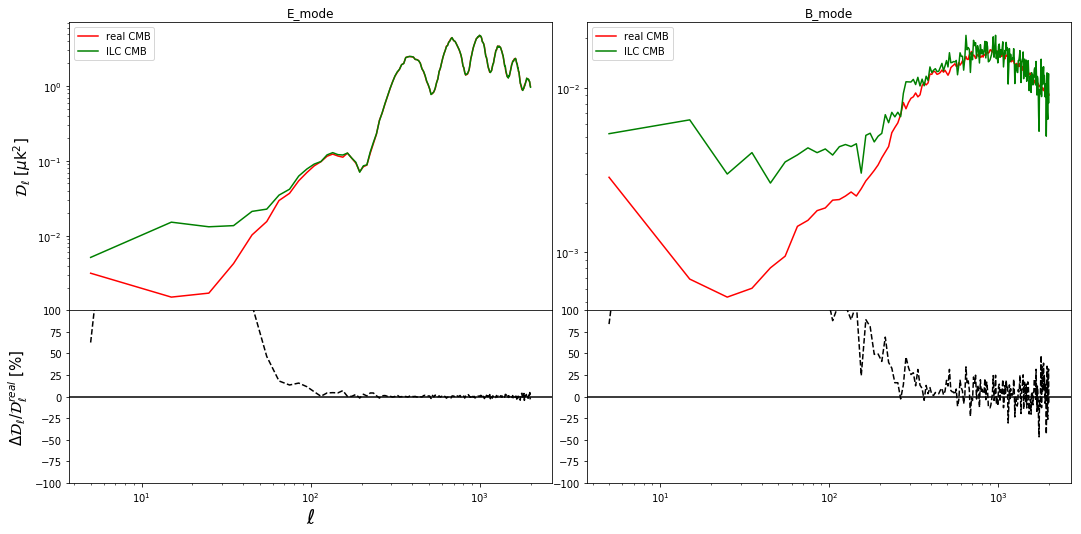

In [350]:
# plt.figure(figsize = (20, 20))
ell = np.arange(len(cls_ILC_pix[2]))

clee_ilc_de = clee_pix - nlee_pix
clbb_ilc_de = clbb_pix - nlbb_pix

## EE
fig2 = plt.figure(2, figsize=(16,8))
# ax = plt.subplot(1,2,1)
plt.axis('off')
frame1=fig2.add_axes((.1,.4,.42,.5))  # x0, y0, width, height
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clee_clean, 'r-',label = 'real CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clee_clean, 'r-',label = 'real CMB')

plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clee_ilc_de, 'g-', label = 'ILC CMB') 
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*nlee_pix, 'b--', label = 'noise_ilc')

# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cl_extra, 'b-',label = 'extra CMB')

plt.xlabel('$\ell$', fontsize = 20); 
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)
plt.legend(fontsize = 10)
plt.title('E_mode')
# plt.title('%s_dust_%s_noise_pixel.png'%(ff, fn))
plt.legend(fontsize = 10)
norm = np.linalg.norm(clee_ilc_de - clee_clean)
# plt.text(80, 0.01, 'Norm = %s'%norm)
# plt.text(80, 0.01/2, 'w_Q = %s'%w_Q)
# plt.text(80, 0.01/4, 'w_U = %s'%w_U)

frame2=fig2.add_axes((.1,.1,.42,.3))
plt.semilogx(Ell, (clee_ilc_de - clee_clean)/clee_clean*100, 'k--')
plt.axhline(0,color = 'k')
plt.ylabel(r'$\Delta \mathcal{D}_\ell$/$\mathcal{D}^{real}_{\ell} $ [%]', fontsize = 15);plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylim(-100, 100)
# plt.savefig('/home/jianyao/Ali_maps/results/1202/3fre_wt_noise_wo_extra_Emode.png', format = 'png')
# ###BB
# fig1 = plt.figure(1, figsize=(10,8))
# # ax = plt.subplot(1,2,1)
# plt.axis('off')
frame3=fig2.add_axes((.55,.4,.42,.5))  # x0, y0, width, height
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clbb_clean, 'r-',label = 'real CMB')
plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clbb_clean, 'r-',label = 'real CMB')

plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*clbb_ilc_de, 'g-', label = 'ILC CMB') 
# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*nlbb_pix, 'b--', label = 'noise_ilc')

# plt.loglog(Ell, Ell*(Ell+1)/2/np.pi*cl_extra, 'b-',label = 'extra CMB')

# plt.xlabel('$\ell$', fontsize = 20); plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$k$^2$]', fontsize = 15)
plt.legend(fontsize = 10)
plt.title('B_mode')
# plt.title('%s_dust_%s_noise_pixel.png'%(ff, fn))
plt.legend(fontsize = 10)
norm = np.linalg.norm(clbb_ilc_de - clbb_clean)
# plt.text(80, 0.5*1e-5, 'Norm = %s'%norm)
# plt.text(80, 1e-4, 'w_Q = %s'%w_Q)
# plt.text(80, 0.1*1e-4, 'w_U = %s'%w_U)

frame4=fig2.add_axes((.55,.1,.42,.3))
plt.semilogx(Ell, (clbb_ilc_de - clbb_clean)/clbb_clean*100, 'k--')
plt.axhline(0,color = 'k')
# plt.ylabel(r'$\Delta \mathcal{D}_\ell$/$\mathcal{D}^{real}_{\ell} $ [%]', fontsize = 15);plt.xlabel(r'$\ell$', fontsize = 20)
plt.ylim(-100, 100)

# plt.savefig('/home/jianyao/Ali_maps/results/1203/3fres_3fres_wt_0.1noise_wo_extra.jpg', format = 'jpg')


In [546]:
Cov = np.zeros((Nf, Nf)); w_real = np.zeros(Nf)
for i in range(Nf):
    for j in range(Nf):
        Cov[i, j] = np.dot(total[i][0] - np.mean(total[i][0]), total[j][0] - np.mean(total[j][0]))/1.0/len(index)

In [547]:
for i in range(Nf):
    w_real[i] = np.sum(1.0/Cov[i,:])/np.sum(1/Cov)

In [549]:
total_I = np.row_stack((total[0][0], total[1][0]))
cmb_I = np.dot(w_real, total_I)

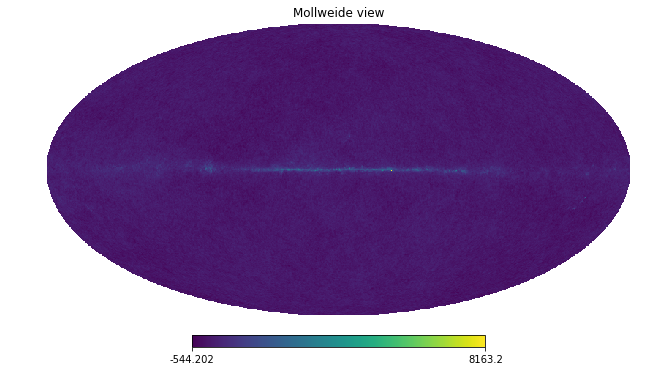

In [554]:
hp.mollview(total[0][0])

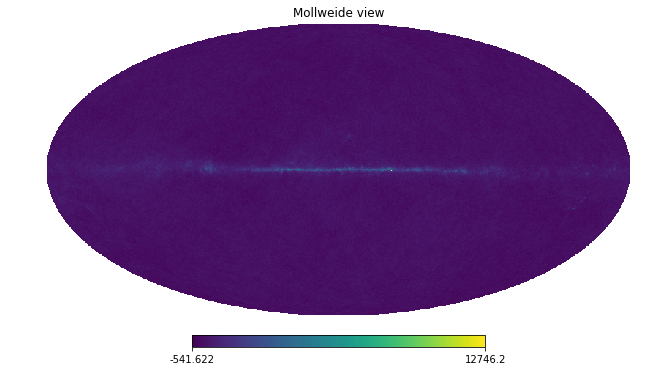

In [553]:
hp.mollview(cmb_I)

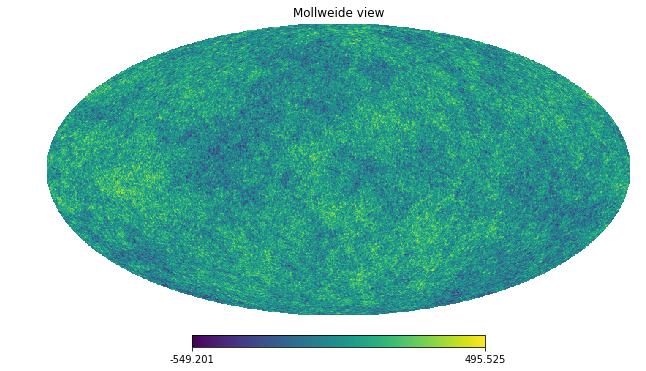

In [552]:
hp.mollview(cmb[0])

In [537]:
cmb_Q = np.dot(w_real, total_Q)

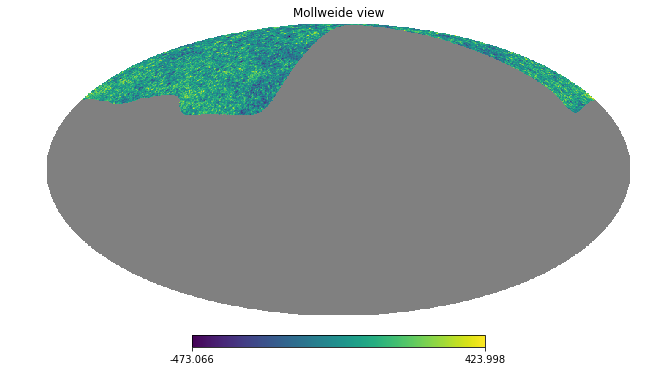

In [538]:
hp.mollview(Mask(total_Q[1]))

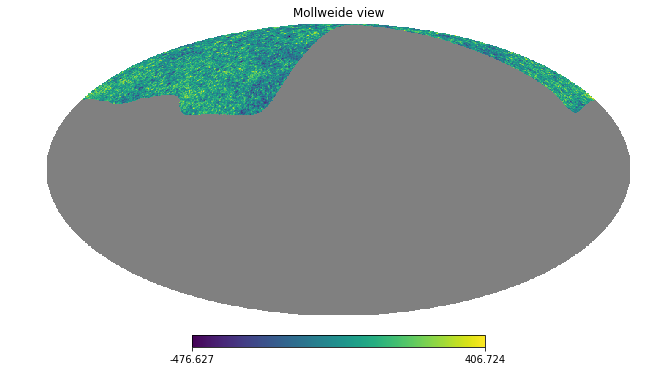

In [541]:
hp.mollview(Mask(cmb[0]))

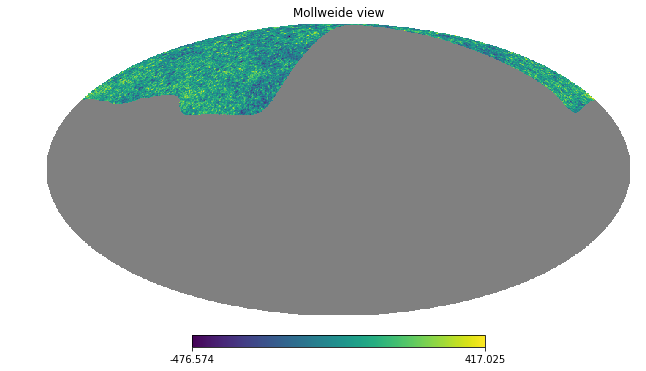

In [540]:
hp.mollview(Mask(cmb_Q))

In [604]:
# rot = hp.rotator.Rotator(rot = [0,0,90])
# roted = rot.rotate_map_pixel(total[0][0])
# hp.mollview(roted, norm = 'hist')

# Mask

In [564]:
mask_none = np.arange(hp.nside2npix(nside))
l_deg_max = 80; l_deg_min = 100  
my_mask = (np.radians(l_deg_max) < hp.pix2ang(nside, mask_none)[0] ) + (hp.pix2ang(nside, mask_none)[0] < np.radians(l_deg_min))# + cm.make_lat_mask(-15,15,nside)

In [568]:
(np.radians(l_deg_max) < hp.pix2ang(nside, mask_none)[0])

array([False, False, False, ...,  True,  True,  True])

In [570]:
hp.pix2ang?

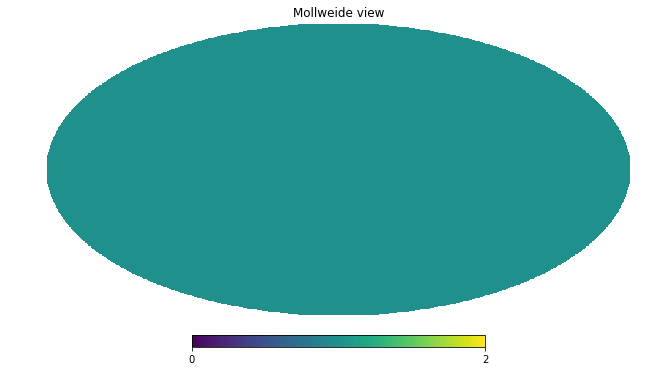

In [565]:
hp.mollview(my_mask)

In [556]:
mask_none

array([       0,        1,        2, ..., 12582909, 12582910, 12582911])

# CAMB CMB cls

In [39]:
pars = camb.CAMBparams(); pars.WantTensors = True
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.26, ombh2=0.022, omch2=0.1199, mnu=0.06, omk=0, tau=0.078)
pars.InitPower.set_params(As=2.19856*1e-9, ns=0.9652, r=0.05)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK', raw_cl=True)

In [31]:
1.881*1e-9/np.e**(-2*0.078)

2.1985620880120438e-09

In [1136]:
total = np.loadtxt('./cls_r_0p05.txt')

In [1318]:
lmax = 2000; Q = 50 #lmax + 1
cl_all_E = np.zeros((SamNum, Q)); cl_all_B = np.zeros((SamNum, Q))
#cl_all_E_l2 = np.zeros((SamNum, Q)); cl_all_B_l2 = np.zeros((SamNum, Q))

for i in range(SamNum):
    cmb_i =  hp.synfast(total, nside = 1024, verbose = False, new = True)
    alms_i = hp.map2alm(Mask(cmb_i))
    alms_i[2] *= 10
    cls_i = hp.alm2cl(alms_i)
#     hp.write_map('/smc/jianyao/Ali_maps/cmb_0.05_realizations/cmb_IQU_%s.fits'%(i), cmb_i)
#     cls_i = hp.anafast(Mask(cmb_i), lmax = lmax, nspec = 3) ## sky with ali_mask
    cl_all_E[i] = bin_l(cls_i[1], lmax, Q) ## EE cls_i[1] #
    cl_all_B[i] = bin_l(cls_i[2], lmax, Q) ## BB cls_i[2] #
    

## test for convolution with mask

In [1332]:
cl_con = hp.anafast(cmb_i[0])
cl_masked = hp.anafast(Mask(cmb_i[0]))
cl_mask = hp.anafast(ali_ma)

In [1352]:
cl_mask_rever = hp.anafast(np.logical_not(ali_ma)*1)

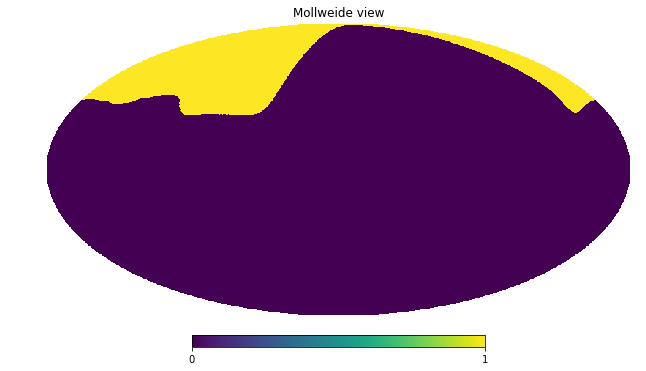

In [1359]:
hp.mollview(ali_ma)

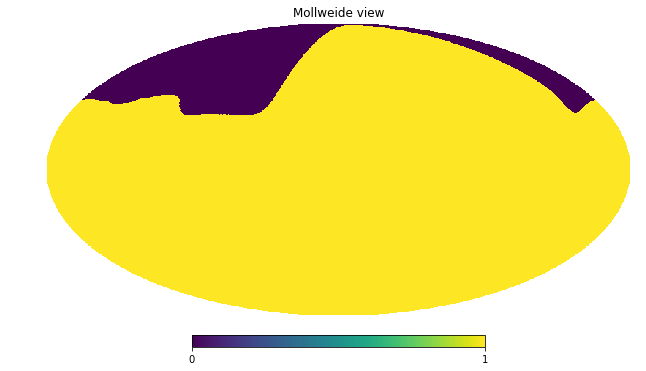

In [1364]:
hp.mollview(np.logical_not(ali_ma)*1)

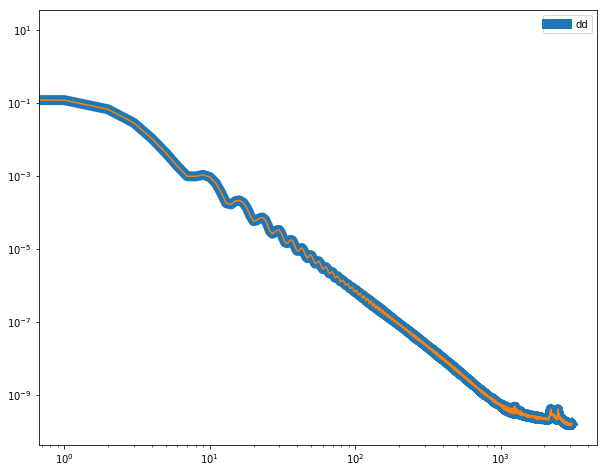

In [1363]:
# lcon = np.arange(len(cl_con))
# plt.plot(lcon, lcon*(lcon+1)/2/np.pi*cl_con)
# plt.plot(lcon, lcon*(lcon+1)/2/np.pi*cl_mask)
plt.plot(lcon, cl_mask, label = 'dd', lw = 10)
# plt.plot(lcon, lcon*(lcon+1)/2/np.pi*(np.convolve(cl_con, cl_mask, 'same')))
plt.plot(lcon, cl_mask_rever)
plt.yscale('log'); plt.xscale('log')
plt.legend()

In [1317]:
# total = np.transpose(powers['total'])
lmax = 2550
ell = np.arange(lmax + 1)
plt.loglog(ell, (ell*(ell+1))/2/np.pi*total[1])
plt.loglog(ell, (ell*(ell+1))/2/np.pi*total[2])

In [41]:
np.savetxt('./cls_r_0p05.txt', total)

In [136]:
cmb_maps = hp.synfast(total, nside = 1024, new = True)
hp.write_map('/smc/jianyao/Ali_maps/cmb_maps_camb.fits', cmb_maps)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# pysm simulation 

In [1266]:
# #

nu = np.array([100, 150, 353]);nside = 1024;
coefficients = convert_units("uK_RJ", "uK_CMB", nu)

def convert_unit(map):
    Nf = len(nu)
    for i in range(0,Nf):
        map[i] = map[i]*coefficients[i]
    return map

# sky_config = {'dust':models('d1', nside)}

sky_config = {'cmb':models('c1', nside)}
sky = pysm.Sky(sky_config)

# dust_pysm = convert_unit(sky.signal()(nu))

# uK_CMB

In [1268]:
cmb_pysm = sky.signal()(100)

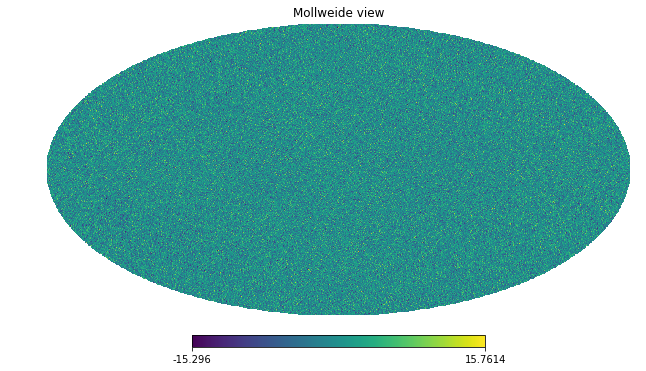

In [1273]:
hp.mollview(cmb_pysm[2])

15008.372537735582

# Ali noise and mask

## noise generation

In [11]:
# calculate the f_sky 
noise_ali = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations1.fits', h = True)
n = (noise_ali[0]*0 + 1)
f_sky = len(n[n==1])/(12.0*nside**2)
# # nl_ful 

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [317]:
### To generate the Ali_observational mask, and mask out the edge parts (I > 5 uK_CMB ) which have large errors.
n2test = hp.read_map('/smc/jianyao/Ali_maps/Noise_maps/fits/I_Noise_95_G_1024.fits', partial=True)
n2zeros = n2test*0 #0,0,nan,nan......
n2 = np.zeros_like(n2test);
index = np.arange(len(n2test))
# n2[n2zeros==0] 
# n2[n2test <= 5] = 1
# ali_mask = hp.write_map('/smc/jianyao/Ali_maps/ali_mask_wo_edge.fits', n2)

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/jianyao/anaconda3/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


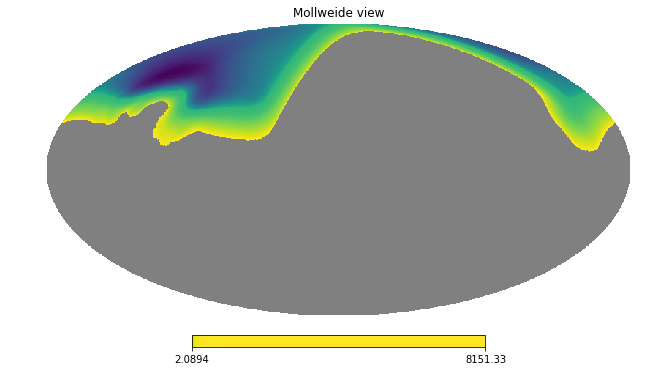

In [338]:
hp.mollview(n2test, norm = 'hist')

In [371]:
## To generate one realization of noise maps. 

n3test = hp.read_map('/smc/jianyao/Ali_maps/Noise_maps/fits/I_Noise_95_G_1024.fits', partial=True)
nIQU = np.zeros((3, len(n3test)))
index = np.arange(len(n2test))#index[n2zeros == 0]
# for i in index[n2test <= 5]:
SamNum = 50
for n in range(SamNum):
    
    for i in index:#[n2zeros==0]:    #full_ali map, without mask out the edge.
        nIQU[0][i] = np.random.normal(0, n3test[i])
        nIQU[1][i] = np.random.normal(0, n3test[i]*np.sqrt(2))
        nIQU[2][i] = np.random.normal(0, n3test[i]*np.sqrt(2))

    hp.write_map('/smc/jianyao/Ali_maps/Noise_realizations/95GHz/noise_realizations_95GHz_%s.fits'%(n), nIQU)

In [858]:
alms = hp.map2alm(Mask(nIQU))
noise_E = hp.alm2map(alms[1], nside = 1024); noise_B = hp.alm2map(alms[2], nside = 1024)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


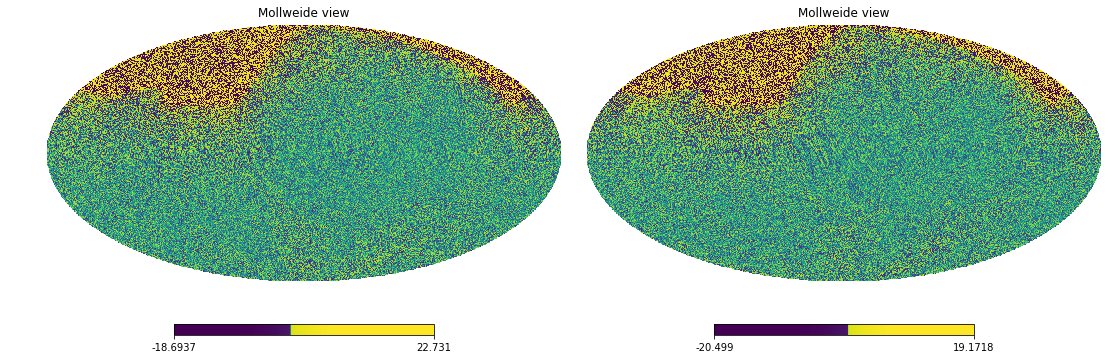

In [865]:
plt.figure(figsize = (15,12))
hp.mollview(noise_E, sub = 121, norm = 'hist'); hp.mollview(noise_B, sub = 122, norm = 'hist')

## Calaulate mean and std of noise and cmb

In [972]:
np.array(list(zip((nl_all_95[0].tolist())[0],(nl_all_95[0].tolist())[1], (nl_all_95[0].tolist())[2]))).shape

(2501, 3)

In [53]:
nl_mean_all.shape

(2, 3, 50)

In [54]:
lmax = 2000; Q = 200 #lmax + 1
SamNum = 50

## E or B; Fre; Bin
nl_all = np.zeros((2, Nf, SamNum, Q));

for i in range(SamNum):
    for j in range(Nf):
        if j == 0:

            noise_i = hp.read_map('/smc/jianyao/Ali_maps/Noise_realizations/95GHz/noise_realizations_95GHz_%s.fits'%(i), field = None, verbose = False)
            nl_i = hp.anafast(utils.Mask(noise_i), lmax = lmax, nspec = 3)
            nl_all[0, j, i] = bin_l(nl_i[1], lmax, Q);  ## EE
            nl_all[1, j, i] = bin_l(nl_i[2], lmax, Q);  ## BB

        if j == 1:

            noise_i = hp.read_map('/smc/jianyao/Ali_maps/Noise_realizations/150GHz/noise_realizations_150GHz_%s.fits'%(i), field = None, verbose = False)
            nl_i = hp.anafast(utils.Mask(noise_i), lmax = lmax, nspec = 3)
            nl_all[0, j, i] = bin_l(nl_i[1], lmax, Q);  ## EE
            nl_all[1, j, i] = bin_l(nl_i[2], lmax, Q);  ## BB

        if j == 2:
            #I, Q, U
            # K_CMB
            noise_i = 1e6*hp.ud_grade(hp.read_map('/fnx/jianyao/noise_simulations/noise_353_full_map_mc_%05d.fits'%i, field = None, verbose = False), nside_out=1024)
            nl_i = hp.anafast(utils.Mask(noise_i), lmax = lmax, nspec = 3)
            nl_all[0, j, i] = bin_l(nl_i[1], lmax, Q);
            nl_all[1, j, i] = bin_l(nl_i[2], lmax, Q);
    
nl_mean_all = np.mean(nl_all, axis = 2);
nl_std_all = np.std(nl_all, axis = 2)


In [ ]:
np.save('/smc/jianyao/Ali_maps/Noise_realizations/nl_mean_all_bw_40.npy',nl_mean_all)
np.save('/smc/jianyao/Ali_maps/Noise_realizations/nl_std_all_bw_40.npy',nl_std_all)

In [285]:
# def bin_test(cls, L, Q):
#     cl_bin = np.zeros((cls.shape[0], cls.shape[1], Q))
#     for i in range(cls.shape[0]):
#         for j in range(cls.shape[1a]):
#             cl_bin[i][j] = bin_l(cls[i][j], L, Q)
    
#     return cl_bin

In [1126]:
Q = 200
nl_all_150_bin = bin_test(nl_all_150, lmax, Q); nl_all_95_bin = bin_test(nl_all_95, lmax, Q)

In [1127]:
nl_mean_150_E = np.mean(nl_all_150_bin, axis = 0)[1]
nl_mean_150_B = np.mean(nl_all_150_bin, axis = 0)[2]

nl_std_150_E = np.std(nl_all_150_bin, axis = 0)[1]
nl_std_150_B = np.std(nl_all_150_bin, axis = 0)[2]


nl_mean_95_E = np.mean(nl_all_95_bin, axis = 0)[1]
nl_mean_95_B = np.mean(nl_all_95_bin, axis = 0)[2]

nl_std_95_E = np.std(nl_all_95_bin, axis = 0)[1]
nl_std_95_B = np.std(nl_all_95_bin, axis = 0)[2]

In [119]:
noise_ali = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations1.fits',field = None, verbose=False)
noise_ali_ma = Mask(noise_ali)
f_sky = np.sum(ali_ma)/(12*nside**2) # f_sky = 0.1120
nl_full = hp.anafast(noise_ali_ma)/f_sky;
wn = hp.synfast(nl_full, nside = nside, new = True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [120]:
f_sky

0.1120460828145345

In [121]:
hp.write_map('/smc/jianyao/Ali_maps/white_noise_realization_95.fits', wn)

In [329]:
noise_ali = hp.read_map('/smc/jianyao/Ali_maps/noise_realizations_150.fits',field = None, verbose=False)

### Noise from Planck Legacy Archive

In [1403]:
#I, Q, U
# K_CMB
Q = 200
nl_353_E = np.zeros((SamNum, Q)); nl_353_B = np.zeros((SamNum, Q))

for i in range(SamNum):
    noise_pla_i = 1e6*hp.ud_grade(hp.read_map('/fnx/jianyao/noise_simulations/noise_353_full_map_mc_%05d.fits'%i, field = None, verbose = False), nside_out=1024)
    nl_i = hp.anafast(Mask(noise_pla_i), lmax = lmax, nspec = 3)
    nl_353_E[i] = bin_l(nl_i[1], lmax, Q);
    nl_353_B[i] = bin_l(nl_i[2], lmax, Q);
    
nl_353_mean_E = np.mean(nl_353_E, axis = 0); nl_353_mean_B = np.mean(nl_353_B, axis = 0)
nl_353_std_E = np.std(nl_353_E, axis = 0); nl_353_std_B = np.std(nl_353_B, axis = 0)
    

# Mpi4py

In [351]:
from mpi4py import MPI 

In [372]:
mask = hp.read_map('/smc/jianyao/Ali_maps/ali_mask_wo_edge.fits')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [383]:
cmb_masktest = Mask(cmb[0])
# cmb_masktest.mask = np.logical_not(mask)

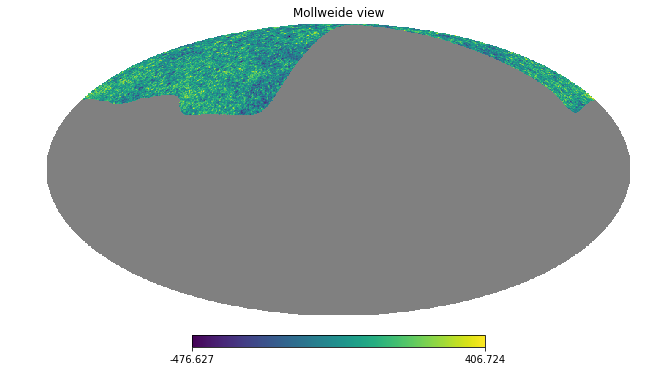

In [384]:
hp.mollview(cmb_masktest)

In [366]:
from mpi4py import MPI 

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

if rank == 0:                                                              
    data = hp.read_map('/smc/jianyao/Ali_maps/Noise_maps/fits/I_Noise_95_G_1024.fits', partial=True)                                                      
    print("process {} bcast data {} to other processes".format(rank, data))
else:                                                                      
    data = None 

data = comm.bcast(data, root=0)

nIQU = np.zeros((3, len(n3test)))
index = np.arange(len(n2test))#index[n2zeros == 0]
# for i in index[n2test <= 5]:
a = np.random.rand()
for i in index[n2zeros==0]:    #full_ali map, without mask out the edge.
    nIQU[0][i] = np.random.normal(0, n3test[i])
    nIQU[1][i] = np.random.normal(0, n3test[i]*np.sqrt(2))
    nIQU[2][i] = np.random.normal(0, n3test[i]*np.sqrt(2))

hp.write_map('/smc/jianyao/Ali_maps/mpitest/noise_realizations_95GHz_%s.fits'%(a), nIQU)

In [ ]:
n3test = hp.read_map('/smc/jianyao/Ali_maps/Noise_maps/fits/I_Noise_95_G_1024.fits', partial=True)
nIQU = np.zeros((3, len(n3test)))
index = np.arange(len(n2test))#index[n2zeros == 0]
# for i in index[n2test <= 5]:
SamNum = 50
for n in range(SamNum):
    
    for i in index[n2zeros==0]:    #full_ali map, without mask out the edge.
        nIQU[0][i] = np.random.normal(0, n3test[i])
        nIQU[1][i] = np.random.normal(0, n3test[i]*np.sqrt(2))
        nIQU[2][i] = np.random.normal(0, n3test[i]*np.sqrt(2))

    hp.write_map('/smc/jianyao/Ali_maps/Noise_realizations/95GHz/noise_realizations_95GHz_%s.fits'%(n), nIQU)

# Test

In [1225]:
alms = hp.map2alm(cmb[0])

In [1228]:
cl_ttest = hp.alm2cl(alms)

In [1236]:
noise_fa = np.ones_like(cmb[0])

In [1237]:
cl_fake = hp.anafast(cmb[0], noise_fa)

In [1240]:
plt.loglog(cl_fake)

In [1229]:
cl_ttest.shape

(3072,)

In [1235]:
np.dot(alms[m_l(3072,2000)], alms[m_l(3072,2000)])

(0.06954906836616115-0.07928971678835048j)

In [1243]:
np.mean(alms[m_l(3072,2500)])

(0.0005229774598842508-0.00012658144312614495j)

## Test for QU to EB maps with Ali mask

In [589]:
tt, ee, bb = hp.anafast(Mask(cmb), nspec = 3)

In [591]:
almt, alme, almb = hp.map2alm(Mask(cmb))

In [649]:
map_b = hp.alm2map(almb, nside = nside); map_e = hp.alm2map(alme, nside = nside)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


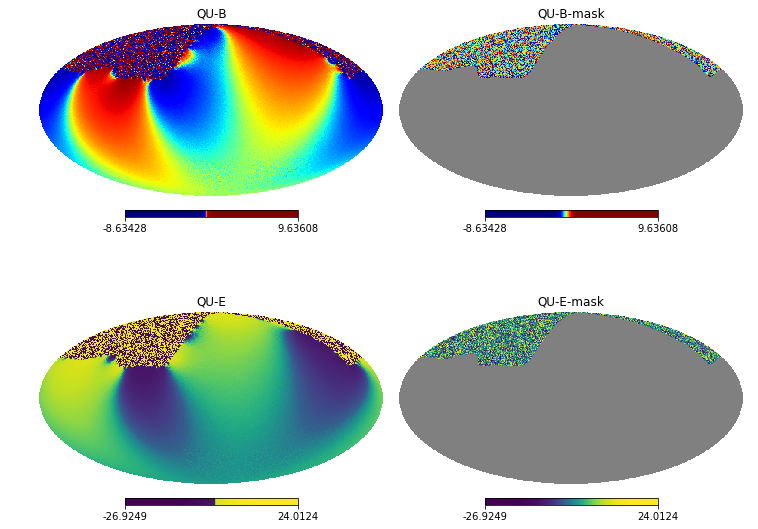

In [676]:
hp.mollview(map_b, norm = 'hist', cmap='jet', sub = 221, title = 'QU-B')
hp.mollview(Mask(map_b), norm = 'hist', cmap='jet', sub = 222, title = 'QU-B-mask')

hp.mollview(map_e, sub = 223, norm = 'hist', title = 'QU-E'); hp.mollview(Mask(map_e), sub = 224, norm = 'hist', title = 'QU-E-mask')
plt.savefig('/home/jianyao/Ali_maps/results/1216/QU-EBmaps.jpg', format = 'jpg')

In [653]:
bb2 = hp.anafast(map_b); bb3 = hp.anafast(Mask(map_b))
ee2 = hp.anafast(map_e); ee3 = hp.anafast(Mask(map_e))

In [662]:
l = np.arange(len(bb))
plt.loglog(l, l*(l+1)/2/np.pi*bb, label = 'QU-EB-ps', lw = 2)
plt.loglog(l, l*(l+1)/2/np.pi*bb2, label = 'QU-EB maps-ps')
plt.loglog(l, l*(l+1)/2/np.pi*bb3, label = 'QU- EB maps- mask -ps')

# plt.loglog(l, l*(l+1)/2/np.pi*bb2)
plt.xlim(2,2000)
plt.ylim(1e-4, 1e-1)

plt.legend()
plt.savefig('/home/jianyao/Ali_maps/results/1215/QU-B.jpg', format = 'jpg')

In [664]:
l = np.arange(len(bb))
plt.loglog(l, l*(l+1)/2/np.pi*ee, label = 'QU-EB-ps', lw = 2)
plt.loglog(l, l*(l+1)/2/np.pi*ee2, label = 'QU-EB maps-ps')
plt.loglog(l, l*(l+1)/2/np.pi*ee3, label = 'QU- EB maps- mask -ps')

# plt.loglog(l, l*(l+1)/2/np.pi*bb2)
plt.xlim(2,2000)
plt.ylim(1e-4, 1e1)

plt.legend()

plt.savefig('/home/jianyao/Ali_maps/results/1215/QU-E.jpg', format = 'jpg')

## Test for QU2EB

In [708]:
tn = 4
test_cmb = np.zeros((3, 12*tn**2)); 
test_cmb[1][100] = 1; #test_cmb[2][100] = 1
#test_cmb[1] = np.arange(12*64*64); test_cmb[2] = np.arange(12*64*64)
test_alms = hp.map2alm(test_cmb)
test_E = hp.alm2map(test_alms[1], nside = tn); test_B = hp.alm2map(test_alms[2], nside = tn)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


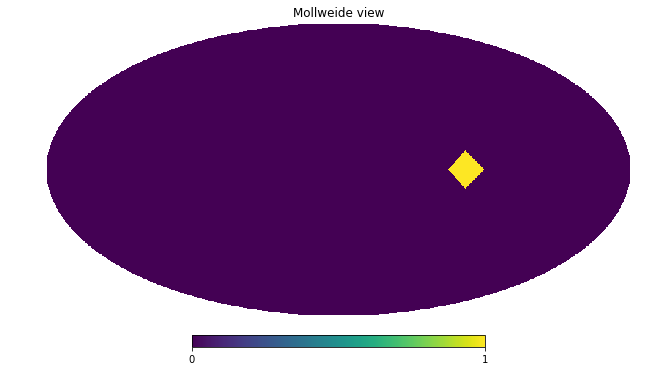

In [709]:
hp.mollview(test_cmb[1])

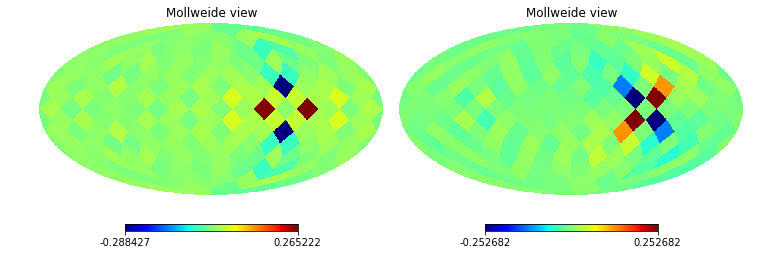

In [712]:
hp.mollview(test_E, sub = 121, cmap = 'jet'); hp.mollview(test_B, sub = 122, cmap = 'jet')

# Test Class

In [932]:
class ABS(object):
    
    def __init__(self, lmax, lmin, bin_number):
        self.lmax = lmax;
        self.lmin = lmin;
        self.bin = bin_number
    def bin_l(self):
        
        return self.lmax/self.lmin


In [933]:
abs = ABS(100, 10, 10)

In [934]:
abs.bin_l()

10.0